In [1]:
from PIL import Image 
from IPython.display import display 
import numpy as np
import random
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Import individuation files

sec_traits = pd.read_csv("Kinds_sec.csv") ## Attention to capital letters vs the files and sequence in form
sec_traits_check = sec_traits + "_check"
sec_traits_rank = sec_traits
columns_names = ["Respondent", "Collector", "Start", "End", "IP", "Email", "Name_1", "Name_2", "Custom", "twitter", "Driver", "Imagination", "Intellect", "Intuition", "Empathy"] + list(sec_traits_check["Name"]) + list(sec_traits_rank["Name"]) + ["TokenID"]
columns_names_2 = ["Respondent", "Collector", "Start", "End", "Driver", "Imagination", "Intellect", "Intuition", "Empathy"] + list(sec_traits_rank["Name"]) + ["TokenID"]
columns_names_3 = ["Imagination", "Intellect", "Intuition", "Empathy"] + list(sec_traits_rank["Name"]) + ["TokenID"]

ind_file_all = pd.read_csv("SOUL INDIVIDUATION all.csv", names=columns_names, usecols =columns_names_2, header=1)
ind_file_coll = pd.read_csv("SOUL INDIVIDUATION collections.csv", names=columns_names, usecols =columns_names_2, header=1)

In [3]:
ind_file_all = ind_file_all.drop(ind_file_all[ind_file_all["TokenID"] == "[tokenID_value"].index, axis=0)

In [4]:
ind_file_coll

,Respondent,Collector,Start,End,Driver,Imagination,Intellect,Intuition,Empathy,artist,...,guided,servant,original,empathetic,ingenious,ally,perfectionist,adventurer,moderator,TokenID
0,118077721035,446675944,07/14/2022 01:51:26 AM,07/14/2022 01:55:46 AM,Intuition,NaN,Angel,NaN,NaN,1.0,...,NaN,NaN,10.0,3.0,NaN,6.0,NaN,NaN,NaN,BAYC
1,118077719436,446675944,07/14/2022 01:48:40 AM,07/14/2022 01:48:47 AM,Intuition,NaN,NaN,Idealist,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCG
2,118077717244,446675944,07/14/2022 01:44:25 AM,07/14/2022 01:44:46 AM,Intuition,NaN,NaN,NaN,Explorer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOW


In [5]:
# Renaming traits

lt_imagination = "Imagination - When facing challenges I'm primarily driven by Imagination"
lt_intuition = "Intuition - When facing challenges I'm primarily driven by Intuition"
lt_intellect = "Intellect - When facing challenges I'm primarily driven by Intellect"
lt_empathy = "Empathy - When facing challenges I'm primarily driven by Empathy and Connection"
lt_visionary = "Visionary: Imagination and persuasion, combined, can transform anything. Ignore common sense, bend, and re-shape reality."
lt_founder = "Founder: Vision without execution is hallucination. Let's create the future, one experiment at a time."
lt_explorer = "Explorer: The truth is out there and belongs to the people who are open, willing to be uncomfortable and take the necessary risks to find it."
lt_mentor = "Mentor: Wisdom comes from investigating reality. Read, contemplate, research, continually strive to turn ignorance into understanding."
lt_rebel = "Rebel: Break free from rules, rulers, and traditions. A chaotic environment can spike creativity, boost excitement, and keep life interesting."
lt_leader = "Leader: Strive to be the role model. Structure, not chaos, takes us closer to significant accomplishments in life."
lt_grinder = "Grinder: Keep grinding. There is no better gift than the ability to self-motivate and keep moving forward during tough times."
lt_idealist = "Idealist: We must choose what is right, call me a dreamer, still, in the end, good always prevails."
lt_teamplayer = "Team player: Collaboration is the ultimate path to success. The ultimate goal in life is to be surrounded by people we admire and trust."
lt_angel = "Angel: Encourage, support, and be empathetic towards others. Sometimes to the point of neglecting ourselves."
lt_trailblazer = "Trailblazer: Life is about passion. Follow the bliss, the path of the soul, the rest will follow."
lt_entertainer = "Entertainer: We only live once, but if we make it fun enough, it more than suffices. It is not that serious."

original_text = [lt_imagination, lt_intuition, lt_intellect, lt_empathy, lt_visionary, lt_founder, lt_explorer, lt_mentor, lt_rebel, lt_leader, lt_grinder, lt_idealist, lt_teamplayer, lt_angel, lt_trailblazer, lt_entertainer]

st_imagination = "Imagination"
st_intuition = "Intuition"
st_intellect = "Intellect"
st_empathy = "Empathy"
st_visionary = "Visionary"
st_founder = "Founder"
st_explorer = "Explorer"
st_mentor = "Mentor"
st_rebel = "Rebel"
st_leader = "Leader"
st_grinder = "Grinder"
st_idealist = "Idealist"
st_teamplayer = "Team Player"
st_angel = "Angel"
st_trailblazer = "Trailblazer"
st_entertainer = "Entertainer"

new_text = [st_imagination, st_intuition, st_intellect, st_empathy, st_visionary, st_founder, st_explorer, st_mentor, st_rebel, st_leader, st_grinder, st_idealist, st_teamplayer, st_angel, st_trailblazer, st_entertainer]

ind_file_all[['Driver', 'Imagination', 'Intellect', 'Intuition', 'Empathy']] = ind_file_all[['Driver', 'Imagination', 'Intellect', 'Intuition', 'Empathy']].replace(to_replace=original_text, value=new_text)
ind_file_all

,Respondent,Collector,Start,End,Driver,Imagination,Intellect,Intuition,Empathy,artist,...,guided,servant,original,empathetic,ingenious,ally,perfectionist,adventurer,moderator,TokenID
0,118154485401,446776237,10/19/2022 07:15:36 PM,10/19/2022 07:25:06 PM,Intellect,NaN,Explorer,NaN,NaN,NaN,...,NaN,NaN,7.0,10.0,NaN,NaN,NaN,9.0,11.0,1
1,118153719884,446776237,10/18/2022 10:42:40 PM,10/18/2022 11:08:19 PM,Intellect,NaN,Mentor,NaN,NaN,NaN,...,NaN,NaN,10.0,3.0,NaN,11.0,NaN,NaN,4.0,2
2,118152838637,446776237,10/18/2022 02:17:30 AM,10/18/2022 02:25:34 AM,Intellect,NaN,Rebel,NaN,NaN,NaN,...,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,11.0,3
3,118148645294,446776237,10/12/2022 04:00:11 PM,10/17/2022 08:13:43 PM,Intuition,NaN,NaN,Leader,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,118152547196,447373517,10/17/2022 08:02:31 PM,10/17/2022 08:04:41 PM,Intuition,NaN,NaN,Grinder,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,12.0,5
5,118143960448,446776237,10/06/2022 01:22:56 PM,10/06/2022 01:38:30 PM,Intellect,NaN,Mentor,NaN,NaN,4.0,...,NaN,NaN,NaN,11.0,NaN,NaN,NaN,12.0,NaN,6
6,118131238116,446776237,09/20/2022 05:14:19 PM,09/20/2022 05:17:41 PM,Imagination,Founder,NaN,NaN,NaN,2.0,...,NaN,NaN,9.0,NaN,NaN,NaN,1.0,5.0,NaN,7
7,118130145702,446776237,09/19/2022 03:06:50 PM,09/19/2022 03:10:20 PM,Imagination,Visionary,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,12.0,7.0,NaN,8
8,118124585908,447373517,09/11/2022 07:05:18 PM,09/11/2022 07:12:36 PM,Empathy,NaN,NaN,NaN,Trailblazer,NaN,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,9
9,118120188439,447373517,09/05/2022 04:00:32 PM,09/05/2022 04:03:33 PM,Intellect,NaN,Mentor,NaN,NaN,NaN,...,NaN,9.0,NaN,8.0,10.0,11.0,NaN,NaN,12.0,10


In [6]:
# Eliminate duplicates in the individuation file

ind_file_all["Start"] = pd.to_datetime(ind_file_all["Start"])
ind_file_all["End"] = pd.to_datetime(ind_file_all["End"])

ind_file_all = ind_file_all.sort_values(by=["TokenID", "End"], ascending=False)
ind_file = ind_file_all.drop_duplicates(subset="TokenID", keep='first')
ind_file = ind_file.reset_index().drop(labels="index", axis=1)[columns_names_3]

# Add single column Archetype and drop separate columns

ind_file["Archetype"] = ind_file["Intellect"][ind_file["Intellect"].notnull()].append(ind_file["Imagination"][ind_file["Imagination"].notnull()]).append(ind_file["Intuition"][ind_file["Intuition"].notnull()]).append(ind_file["Empathy"][ind_file["Empathy"].notnull()])
ind_file = ind_file.drop(labels=["Imagination", "Intellect", "Intuition", "Empathy"], axis=1)


ind_file_coll["Archetype"] = ind_file_coll["Intellect"][ind_file_coll["Intellect"].notnull()].append(ind_file_coll["Imagination"][ind_file_coll["Imagination"].notnull()]).append(ind_file_coll["Intuition"][ind_file_coll["Intuition"].notnull()]).append(ind_file_coll["Empathy"][ind_file_coll["Empathy"].notnull()])
ind_file_coll = ind_file_coll.drop(columns=["Imagination", "Intellect", "Intuition", "Empathy", "Respondent", "Collector", "Start", "End"])



In [7]:
# Fill nan with zero

ind_file = ind_file.fillna(0)
ind_file_coll = ind_file_coll.fillna(0)

In [8]:
ind_file_coll

,Driver,artist,connector,bonvivant,still,blindfolded,realist,controller,agnostic,traditionalist,...,servant,original,empathetic,ingenious,ally,perfectionist,adventurer,moderator,TokenID,Archetype
0,Intuition,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,10.0,3.0,0.0,6.0,0.0,0.0,0.0,BAYC,Angel
1,Intuition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCG,Idealist
2,Intuition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WOW,Explorer


In [9]:
ind_file["Archetype"] = ind_file["Archetype"].str.lower()
ind_file["Archetype"] = ind_file["Archetype"].replace(to_replace = "team player",value = "team_player")
ind_file["Archetype"]

0     team_player
1         founder
2        idealist
3          mentor
4          mentor
5       visionary
6        explorer
7       visionary
8        explorer
9           angel
10      visionary
11        founder
12         mentor
13       idealist
14         mentor
15       idealist
16          angel
17       idealist
18      visionary
19         leader
20        grinder
21         mentor
22       explorer
23    trailblazer
24        founder
25       idealist
26      visionary
27      visionary
28      visionary
29         mentor
30      visionary
31          angel
32    team_player
33          rebel
34         leader
35        grinder
36          rebel
37        grinder
38      visionary
39         mentor
40    trailblazer
41      visionary
42        founder
43         mentor
44        grinder
45         leader
46          rebel
47         mentor
48       explorer
Name: Archetype, dtype: object

In [10]:
# Check if any archetype is not in the file for people:

ind_file["Archetype"] = ind_file["Archetype"].str.lower().replace(" ","_")

arche_list = ["idealist", "leader", "founder", "angel", "team_player", "entertainer", "trailblazer", "grinder", "visionary", "rebel", "explorer", "mentor"]

arche_diff = set(arche_list).difference(ind_file["Archetype"])

arche_diff

{'entertainer'}

In [11]:
list(arche_diff)

add_arche = pd.DataFrame(columns=list(arche_diff))
add_arche

,entertainer


In [12]:
ind_file['Archetype']

0     team_player
1         founder
2        idealist
3          mentor
4          mentor
5       visionary
6        explorer
7       visionary
8        explorer
9           angel
10      visionary
11        founder
12         mentor
13       idealist
14         mentor
15       idealist
16          angel
17       idealist
18      visionary
19         leader
20        grinder
21         mentor
22       explorer
23    trailblazer
24        founder
25       idealist
26      visionary
27      visionary
28      visionary
29         mentor
30      visionary
31          angel
32    team_player
33          rebel
34         leader
35        grinder
36          rebel
37        grinder
38      visionary
39         mentor
40    trailblazer
41      visionary
42        founder
43         mentor
44        grinder
45         leader
46          rebel
47         mentor
48       explorer
Name: Archetype, dtype: object

In [13]:
# Create dummy variables for Archetype (people)

dummy = pd.get_dummies(ind_file["Archetype"])

ind_file_f = pd.concat([ind_file, dummy, add_arche], axis=1).fillna(0)
ind_file_f = ind_file_f.drop(columns="Archetype")

col_seq = ind_file_f.columns
col_seq

Index(['artist', 'connector', 'bonvivant', 'still', 'blindfolded', 'realist',
       'controller', 'agnostic', 'traditionalist', 'aequanimus', 'believer',
       'nomad', 'modernist', 'player', 'poet', 'simulation', 'director',
       'like_water', 'optimistic', 'enthusiast', 'shapeshifter', 'jumper',
       'seeker', 'achiever', 'champion', 'juggler', 'keeper', 'guided',
       'servant', 'original', 'empathetic', 'ingenious', 'ally',
       'perfectionist', 'adventurer', 'moderator', 'TokenID', 'angel',
       'explorer', 'founder', 'grinder', 'idealist', 'leader', 'mentor',
       'rebel', 'team_player', 'trailblazer', 'visionary', 'entertainer'],
      dtype='object')

In [14]:
len(ind_file_f.columns)

49

In [15]:
# Check if any archetype is not in the file for collections:

arche_coll_list = arche_list

arche_coll_diff = set(arche_coll_list).difference(ind_file_coll["Archetype"])

list(arche_coll_diff)

['team_player',
 'leader',
 'idealist',
 'grinder',
 'visionary',
 'entertainer',
 'explorer',
 'trailblazer',
 'mentor',
 'angel',
 'rebel',
 'founder']

In [16]:
ind_file_coll['Archetype']

0       Angel
1    Idealist
2    Explorer
Name: Archetype, dtype: object

In [17]:
add_arche_coll = pd.DataFrame(columns=list(arche_coll_diff))
add_arche_coll

,team_player,leader,idealist,grinder,visionary,entertainer,explorer,trailblazer,mentor,angel,rebel,founder


In [18]:
# Create dummy variables for Archetype (collections)



dummy = pd.get_dummies(ind_file_coll["Archetype"])

ind_file_f_coll = pd.concat([ind_file_coll, dummy, add_arche_coll], axis=1).fillna(0)
ind_file_f_coll = ind_file_f_coll.drop(columns="Archetype")


In [19]:
# Adjust columns sequence (collection)

ind_file_f_coll = ind_file_f_coll[col_seq]
ind_file_f_coll.columns

Index(['artist', 'connector', 'bonvivant', 'still', 'blindfolded', 'realist',
       'controller', 'agnostic', 'traditionalist', 'aequanimus', 'believer',
       'nomad', 'modernist', 'player', 'poet', 'simulation', 'director',
       'like_water', 'optimistic', 'enthusiast', 'shapeshifter', 'jumper',
       'seeker', 'achiever', 'champion', 'juggler', 'keeper', 'guided',
       'servant', 'original', 'empathetic', 'ingenious', 'ally',
       'perfectionist', 'adventurer', 'moderator', 'TokenID', 'angel',
       'explorer', 'founder', 'grinder', 'idealist', 'leader', 'mentor',
       'rebel', 'team_player', 'trailblazer', 'visionary', 'entertainer'],
      dtype='object')

In [20]:
new_text

['Imagination',
 'Intuition',
 'Intellect',
 'Empathy',
 'Visionary',
 'Founder',
 'Explorer',
 'Mentor',
 'Rebel',
 'Leader',
 'Grinder',
 'Idealist',
 'Team Player',
 'Angel',
 'Trailblazer',
 'Entertainer']

In [21]:
ind_file_f

,artist,connector,bonvivant,still,blindfolded,realist,controller,agnostic,traditionalist,aequanimus,...,founder,grinder,idealist,leader,mentor,rebel,team_player,trailblazer,visionary,entertainer
0,0.0,5.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0,0,0,0,0,0,1,0,0,0
1,4.0,0.0,0.0,5.0,0.0,9.0,0.0,12.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,12.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,11.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,5.0,1.0,9.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,7.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0,0,0,0,1,0,0,0,0,0
5,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
6,7.0,0.0,10.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,6.0,5.0,0.0,8.0,10.0,0.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,0,1,0
8,0.0,0.0,0.0,2.0,0.0,5.0,4.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9,2.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Match

In [22]:
politics_weight = [100, 100, 100]

spiritual_weight = [100, 100, 100]

other_weights = [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


# Adjust weights for political traits:

ind_file_f[['traditionalist', 'modernist']] = ind_file_f[['traditionalist', 'modernist']].replace(to_replace=[1, 2, 3], value=politics_weight)
ind_file_f[['traditionalist', 'modernist']] = ind_file_f[['traditionalist', 'modernist']].replace(to_replace=[4, 5, 6, 7, 8], value=[80, 80, 80, 80, 80])
ind_file_f[['traditionalist', 'modernist']] = ind_file_f[['traditionalist', 'modernist']].replace(to_replace=[9, 10, 11, 12], value=[50, 50, 50, 50])


# Spiritual

ind_file_f[['agnostic', 'guided']] = ind_file_f[['agnostic', 'guided']].replace(to_replace=[1, 2, 3], value=spiritual_weight)
ind_file_f[['agnostic', 'guided']] = ind_file_f[['agnostic', 'guided']].replace(to_replace=[4, 5, 6, 7, 8], value=[80, 80, 80, 80, 80])
ind_file_f[['agnostic', 'guided']] = ind_file_f[['agnostic', 'guided']].replace(to_replace=[9, 10, 11, 12], value=[50, 50, 50, 50])


# Adjust weights for main archetype (people)

ind_file_f[["idealist", "leader", "founder", "angel", "team_player", "entertainer", "trailblazer", "grinder", "visionary", "rebel", "explorer", "mentor"]] = ind_file_f[["idealist", "leader", "founder", "angel", "team_player", "entertainer", "trailblazer", "grinder", "visionary", "rebel", "explorer", "mentor"]].replace(to_replace=[1], value=[50])


# Adjust weights for first 3 traits:

ind_file_f[['artist', 'connector', 'bonvivant', 'still', 'blindfolded', 'realist',
       'controller', 'aequanimus', 'nomad', 'player', 'poet', 'director',
       'like_water', 'optimistic', 'enthusiast', 'shapeshifter', 'jumper',
       'seeker', 'achiever', 'champion', 'juggler', 'keeper',
       'servant', 'original', 'empathetic', 'ingenious', 'ally',
       'perfectionist', 'adventurer', 'simulation', 'moderator', 'believer']] = ind_file_f[['artist', 'connector', 'bonvivant', 'still', 'blindfolded', 'realist',
       'controller', 'aequanimus', 'nomad', 'player', 'poet', 'director',
       'like_water', 'optimistic', 'enthusiast', 'shapeshifter', 'jumper',
       'seeker', 'achiever', 'champion', 'juggler', 'keeper',
       'servant', 'original', 'empathetic', 'ingenious', 'ally',
       'perfectionist', 'adventurer', 'simulation', 'moderator', 'believer']].replace(to_replace=[1, 2, 3], value=[40, 40, 40])



# Traits 4-8 except spiritual or politics

ind_file_f[['artist', 'connector', 'bonvivant', 'still', 'blindfolded', 'realist',
       'controller', 'aequanimus', 'nomad', 'player', 'poet', 'director',
       'like_water', 'optimistic', 'enthusiast', 'shapeshifter', 'jumper',
       'seeker', 'achiever', 'champion', 'juggler', 'keeper',
       'servant', 'original', 'empathetic', 'ingenious', 'ally',
       'perfectionist', 'adventurer', 'simulation', 'moderator', 'believer']] = ind_file_f[['artist', 'connector', 'bonvivant', 'still', 'blindfolded', 'realist',
       'controller', 'aequanimus', 'nomad', 'player', 'poet', 'director',
       'like_water', 'optimistic', 'enthusiast', 'shapeshifter', 'jumper',
       'seeker', 'achiever', 'champion', 'juggler', 'keeper',
       'servant', 'original', 'empathetic', 'ingenious', 'ally',
       'perfectionist', 'adventurer', 'simulation', 'moderator', 'believer']].replace([4, 5, 6, 7, 8], value=[35, 35, 35, 35, 35])

# Traits 9-12 except spiritual or politics

ind_file_f[['artist', 'connector', 'bonvivant', 'still', 'blindfolded', 'realist',
       'controller', 'aequanimus', 'nomad', 'player', 'poet', 'director',
       'like_water', 'optimistic', 'enthusiast', 'shapeshifter', 'jumper',
       'seeker', 'achiever', 'champion', 'juggler', 'keeper',
       'servant', 'original', 'empathetic', 'ingenious', 'ally',
       'perfectionist', 'adventurer', 'simulation', 'moderator', 'believer']] = ind_file_f[['artist', 'connector', 'bonvivant', 'still', 'blindfolded', 'realist',
       'controller', 'aequanimus', 'nomad', 'player', 'poet', 'director',
       'like_water', 'optimistic', 'enthusiast', 'shapeshifter', 'jumper',
       'seeker', 'achiever', 'champion', 'juggler', 'keeper',
       'servant', 'original', 'empathetic', 'ingenious', 'ally',
       'perfectionist', 'adventurer', 'simulation', 'moderator', 'believer']].replace([9, 10, 11, 12], value=[30, 30, 30, 30])

In [23]:
# Add weight to politics and spiritual if not choosen before:


index1 = ind_file_f.loc[(ind_file_f["guided"] == 0) & (ind_file_f["agnostic"] == 0) & (ind_file_f["believer"] == 0) & (ind_file_f["simulation"] == 0)].index
index1

Index([0, 4, 5, 10, 13, 16, 18, 24, 25, 26, 27, 28, 32, 43, 46], dtype='object')

In [24]:
ind_file_f.loc[index1, "believer"] = ind_file_f.iloc[index1][["believer"]].replace(to_replace = [0], value=[20])
ind_file_f["believer"]

0     20.0
1      0.0
2     35.0
3     30.0
4     20.0
5     20.0
6     30.0
7      0.0
8     40.0
9     35.0
10    20.0
11    35.0
12     0.0
13    20.0
14    35.0
15     0.0
16    20.0
17    40.0
18    20.0
19     0.0
20    30.0
21     0.0
22     0.0
23    35.0
24    20.0
25    20.0
26    20.0
27    20.0
28    20.0
29    30.0
30    35.0
31    30.0
32    20.0
33    40.0
34     0.0
35    35.0
36    35.0
37     0.0
38     0.0
39    40.0
40    35.0
41    35.0
42    30.0
43    20.0
44     0.0
45    30.0
46    20.0
47    40.0
48    35.0
Name: believer, dtype: float64

In [27]:
index2 = ind_file_f.loc[(ind_file_f["modernist"] == 0) & (ind_file_f["traditionalist"] == 0) & (ind_file_f["moderator"] == 0)].index
list(index2)

[0, 1, 7, 11, 13, 15, 16, 17, 20, 23, 27, 30, 33, 36, 37, 38, 40, 42, 43]

In [29]:
ind_file_f.loc[index2, "moderator"] = ind_file_f.iloc[index2][["moderator"]].replace(to_replace = [0], value=[20])
ind_file_f["moderator"]

0     20.0
1     20.0
2      0.0
3      0.0
4     35.0
5      0.0
6     35.0
7     20.0
8      0.0
9      0.0
10    30.0
11    20.0
12    30.0
13    20.0
14     0.0
15    20.0
16    20.0
17    20.0
18     0.0
19    40.0
20    20.0
21     0.0
22    35.0
23    20.0
24     0.0
25    30.0
26     0.0
27    20.0
28     0.0
29     0.0
30    20.0
31    35.0
32     0.0
33    20.0
34     0.0
35    30.0
36    20.0
37    20.0
38    20.0
39    30.0
40    20.0
41     0.0
42    20.0
43    20.0
44    30.0
45     0.0
46    30.0
47    35.0
48    30.0
Name: moderator, dtype: float64

In [31]:
# New vectors based on archetype circle

vectors_people = ind_file_f

## 1st level

#vectors_people["ideal_founder"] = (vectors_people["Idealist"] + vectors_people["Founder"])*0.5
#vectors_people["founder_leader"] = (vectors_people["Founder"] + vectors_people["Leader"])*0.5
#vectors_people["leader_angel"] = (vectors_people["Leader"] + vectors_people["Angel"])*0.5
#vectors_people["angel_team"] = (vectors_people["Angel"] + vectors_people["Team Player"])*0.5
#vectors_people["team_entertainer"] = (vectors_people["Team Player"] + vectors_people["Entertainer"])*0.5
#vectors_people["entertainer_trail"] = (vectors_people["Entertainer"] + vectors_people["Trailblazer"])*0.5
#vectors_people["trail_grinder"] = (vectors_people["Trailblazer"] + vectors_people["Grinder"])*0.5
#vectors_people["grinder_visionary"] = (vectors_people["Grinder"] + vectors_people["Visionary"])*0.5
#vectors_people["visionary_rebel"] = (vectors_people["Visionary"] + vectors_people["Rebel"])*0.5
#vectors_people["rebel_explorer"] = (vectors_people["Rebel"] + vectors_people["Explorer"])*0.5
#vectors_people["explorer_mentor"] = (vectors_people["Explorer"] + vectors_people["Mentor"])*0.5
#vectors_people["mentor_ideal"] = (vectors_people["Mentor"] + vectors_people["Idealist"])*0.5


## 2nd level

vectors_people["ideal_leader"] = (vectors_people["idealist"] + vectors_people["leader"])
vectors_people["founder_angel"] = (vectors_people["founder"] + vectors_people["angel"])
vectors_people["leader_team"] = (vectors_people["leader"] + vectors_people["team_player"])
vectors_people["angel_entertainer"] = (vectors_people["angel"] + vectors_people["entertainer"])
vectors_people["team_trail"] = (vectors_people["team_player"] + vectors_people["trailblazer"])
vectors_people["entertainer_grinder"] = (vectors_people["entertainer"] + vectors_people["grinder"])
vectors_people["trail_visionary"] = (vectors_people["trailblazer"] + vectors_people["visionary"])
vectors_people["grinder_rebel"] = (vectors_people["grinder"] + vectors_people["rebel"])
vectors_people["visionary_explorer"] = (vectors_people["visionary"] + vectors_people["explorer"])
vectors_people["rebel_mentor"] = (vectors_people["rebel"] + vectors_people["mentor"])
vectors_people["explorer_ideal"] = (vectors_people["explorer"] + vectors_people["idealist"])
vectors_people["mentor_founder"] = (vectors_people["mentor"] + vectors_people["founder"])


In [32]:
vectors_people = vectors_people.drop(columns="TokenID")
vectors_people

,artist,connector,bonvivant,still,blindfolded,realist,controller,agnostic,traditionalist,aequanimus,...,leader_team,angel_entertainer,team_trail,entertainer_grinder,trail_visionary,grinder_rebel,visionary_explorer,rebel_mentor,explorer_ideal,mentor_founder
0,0.0,35.0,30.0,35.0,0.0,0.0,0.0,0.0,0.0,35.0,...,50,0,50,0,0,0,0,0,0,0
1,35.0,0.0,0.0,35.0,0.0,30.0,0.0,50.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,50
2,30.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,100.0,30.0,...,0,0,0,0,0,0,0,0,50,0
3,0.0,35.0,40.0,30.0,0.0,0.0,0.0,0.0,50.0,0.0,...,0,0,0,0,0,0,0,50,0,50
4,0.0,35.0,40.0,30.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0,0,0,0,0,0,0,50,0,50
5,40.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,50,0,50,0,0,0
6,35.0,0.0,30.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,50,0,50,0
7,40.0,35.0,35.0,0.0,35.0,30.0,0.0,0.0,0.0,30.0,...,0,0,0,0,50,0,50,0,0,0
8,0.0,0.0,0.0,40.0,0.0,35.0,35.0,0.0,0.0,40.0,...,0,0,0,0,0,0,50,0,50,0
9,40.0,35.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,50,0,0,0,0,0,0,0,0


In [34]:
vectors_people.drop(["idealist", "leader", "founder", "angel", "team_player", "entertainer", "trailblazer", "grinder", "visionary", "rebel", "explorer", "mentor"], axis=1)
#vectors_people[["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"]] = (vectors_people[["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"]])*(-1)

,artist,connector,bonvivant,still,blindfolded,realist,controller,agnostic,traditionalist,aequanimus,...,leader_team,angel_entertainer,team_trail,entertainer_grinder,trail_visionary,grinder_rebel,visionary_explorer,rebel_mentor,explorer_ideal,mentor_founder
0,0.0,35.0,30.0,35.0,0.0,0.0,0.0,0.0,0.0,35.0,...,50,0,50,0,0,0,0,0,0,0
1,35.0,0.0,0.0,35.0,0.0,30.0,0.0,50.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,50
2,30.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,100.0,30.0,...,0,0,0,0,0,0,0,0,50,0
3,0.0,35.0,40.0,30.0,0.0,0.0,0.0,0.0,50.0,0.0,...,0,0,0,0,0,0,0,50,0,50
4,0.0,35.0,40.0,30.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0,0,0,0,0,0,0,50,0,50
5,40.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,50,0,50,0,0,0
6,35.0,0.0,30.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,50,0,50,0
7,40.0,35.0,35.0,0.0,35.0,30.0,0.0,0.0,0.0,30.0,...,0,0,0,0,50,0,50,0,0,0
8,0.0,0.0,0.0,40.0,0.0,35.0,35.0,0.0,0.0,40.0,...,0,0,0,0,0,0,50,0,50,0
9,40.0,35.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,50,0,0,0,0,0,0,0,0


In [35]:
vectors_people

,artist,connector,bonvivant,still,blindfolded,realist,controller,agnostic,traditionalist,aequanimus,...,leader_team,angel_entertainer,team_trail,entertainer_grinder,trail_visionary,grinder_rebel,visionary_explorer,rebel_mentor,explorer_ideal,mentor_founder
0,0.0,35.0,30.0,35.0,0.0,0.0,0.0,0.0,0.0,35.0,...,50,0,50,0,0,0,0,0,0,0
1,35.0,0.0,0.0,35.0,0.0,30.0,0.0,50.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,50
2,30.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,100.0,30.0,...,0,0,0,0,0,0,0,0,50,0
3,0.0,35.0,40.0,30.0,0.0,0.0,0.0,0.0,50.0,0.0,...,0,0,0,0,0,0,0,50,0,50
4,0.0,35.0,40.0,30.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0,0,0,0,0,0,0,50,0,50
5,40.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,50,0,50,0,0,0
6,35.0,0.0,30.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,50,0,50,0
7,40.0,35.0,35.0,0.0,35.0,30.0,0.0,0.0,0.0,30.0,...,0,0,0,0,50,0,50,0,0,0
8,0.0,0.0,0.0,40.0,0.0,35.0,35.0,0.0,0.0,40.0,...,0,0,0,0,0,0,50,0,50,0
9,40.0,35.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,50,0,0,0,0,0,0,0,0


In [36]:
# Calculate cosine similarity between people

matrix_p = np.round_(cosine_similarity(vectors_people)*100, 2)

In [37]:
df_p = pd.DataFrame(matrix_p)

In [38]:
df_p

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,100.00,22.56,22.10,33.10,32.97,31.49,32.56,21.77,23.01,20.81,...,21.85,51.35,39.08,35.58,43.48,30.35,35.30,19.96,27.13,8.35
1,22.56,100.00,10.86,45.78,25.54,19.73,32.24,24.03,33.79,46.44,...,21.88,35.11,9.90,45.33,35.44,35.94,13.28,12.08,30.36,17.11
2,22.10,10.86,100.00,27.84,28.87,32.65,28.21,7.43,44.03,29.39,...,16.87,12.48,29.48,17.25,23.42,31.22,59.49,20.26,42.67,38.82
3,33.10,45.78,27.84,100.00,44.48,14.15,25.60,14.37,24.37,47.07,...,48.67,49.48,23.63,40.67,56.41,13.59,29.31,25.69,49.63,11.21
4,32.97,25.54,28.87,44.48,100.00,35.53,22.81,32.26,39.02,32.88,...,53.64,25.05,47.78,25.02,53.19,37.13,33.70,60.10,46.90,45.55
5,31.49,19.73,32.65,14.15,35.53,100.00,32.60,51.38,41.06,35.51,...,18.58,43.70,64.64,23.16,32.99,27.61,26.61,31.11,23.82,43.83
6,32.56,32.24,28.21,25.60,22.81,32.60,100.00,49.27,49.83,22.22,...,25.99,35.00,30.03,33.18,41.70,26.87,18.17,18.69,27.40,56.88
7,21.77,24.03,7.43,14.37,32.26,51.38,49.27,100.00,32.46,19.59,...,20.02,32.74,58.43,23.75,24.09,20.41,29.12,32.10,12.16,32.06
8,23.01,33.79,44.03,24.37,39.02,41.06,49.83,32.46,100.00,37.70,...,9.93,23.48,40.45,8.26,13.36,39.38,36.28,22.81,22.43,64.78
9,20.81,46.44,29.39,47.07,32.88,35.51,22.22,19.59,37.70,100.00,...,24.38,39.57,30.81,38.16,22.01,23.91,25.60,29.20,23.63,26.67


In [39]:
ind_score_p = pd.concat([df_p, ind_file_f["TokenID"]], axis=1)

In [40]:
ind_score_p = ind_score_p.rename(columns=ind_file_f["TokenID"])

In [41]:
ind_score_p

,49,48,47,46,45,44,43,42,41,40,...,9,8,7,6,5,4,3,2,1,TokenID
0,100.00,22.56,22.10,33.10,32.97,31.49,32.56,21.77,23.01,20.81,...,51.35,39.08,35.58,43.48,30.35,35.30,19.96,27.13,8.35,49
1,22.56,100.00,10.86,45.78,25.54,19.73,32.24,24.03,33.79,46.44,...,35.11,9.90,45.33,35.44,35.94,13.28,12.08,30.36,17.11,48
2,22.10,10.86,100.00,27.84,28.87,32.65,28.21,7.43,44.03,29.39,...,12.48,29.48,17.25,23.42,31.22,59.49,20.26,42.67,38.82,47
3,33.10,45.78,27.84,100.00,44.48,14.15,25.60,14.37,24.37,47.07,...,49.48,23.63,40.67,56.41,13.59,29.31,25.69,49.63,11.21,46
4,32.97,25.54,28.87,44.48,100.00,35.53,22.81,32.26,39.02,32.88,...,25.05,47.78,25.02,53.19,37.13,33.70,60.10,46.90,45.55,45
5,31.49,19.73,32.65,14.15,35.53,100.00,32.60,51.38,41.06,35.51,...,43.70,64.64,23.16,32.99,27.61,26.61,31.11,23.82,43.83,44
6,32.56,32.24,28.21,25.60,22.81,32.60,100.00,49.27,49.83,22.22,...,35.00,30.03,33.18,41.70,26.87,18.17,18.69,27.40,56.88,43
7,21.77,24.03,7.43,14.37,32.26,51.38,49.27,100.00,32.46,19.59,...,32.74,58.43,23.75,24.09,20.41,29.12,32.10,12.16,32.06,42
8,23.01,33.79,44.03,24.37,39.02,41.06,49.83,32.46,100.00,37.70,...,23.48,40.45,8.26,13.36,39.38,36.28,22.81,22.43,64.78,41
9,20.81,46.44,29.39,47.07,32.88,35.51,22.22,19.59,37.70,100.00,...,39.57,30.81,38.16,22.01,23.91,25.60,29.20,23.63,26.67,40


In [42]:
# Creating dataframe with both IDs as rows

ind_score_p["TokenID2"] = ind_score_p.columns[:-1]


In [43]:
ind_score_p["TokenID2"]

0     49
1     48
2     47
3     46
4     45
5     44
6     43
7     42
8     41
9     40
10    39
11    38
12    37
13    36
14    35
15    34
16    33
17    32
18    31
19    30
20    29
21    28
22    27
23    26
24    25
25    24
26    23
27    22
28    21
29    20
30    19
31    18
32    17
33    16
34    15
35    14
36    13
37    12
38    11
39    10
40     9
41     8
42     7
43     6
44     5
45     4
46     3
47     2
48     1
Name: TokenID2, dtype: object

In [44]:
ind_score_p_final = pd.melt(ind_score_p, id_vars="TokenID", var_name="TokenID2", value_name="score")

In [45]:
ind_score_p_final = ind_score_p_final.drop(labels=ind_score_p_final[ind_score_p_final["TokenID2"] == "TokenID2"].index)

In [46]:
ind_score_p_final = ind_score_p_final.drop((ind_score_p_final[ind_score_p_final["TokenID2"] == ind_score_p_final["TokenID"]]).index)

In [47]:
ind_score_p_final = ind_score_p_final.sort_values(by=["TokenID", "score"], ascending=False)

In [48]:
ind_score_p_final

,TokenID,TokenID2,score
1764,49,13,52.27
1960,49,9,51.35
539,49,38,49.06
1323,49,22,45.35
1568,49,17,44.2
...,...,...,...
587,1,38,16.18
1812,1,13,14.45
195,1,46,11.21
1861,1,12,9.43


In [49]:
arche_token_list = ind_file[["Archetype", "TokenID"]]

In [50]:
arche_token_list

,Archetype,TokenID
0,team_player,49
1,founder,48
2,idealist,47
3,mentor,46
4,mentor,45
5,visionary,44
6,explorer,43
7,visionary,42
8,explorer,41
9,angel,40


In [51]:
#pd.set_option("display.max_columns", 50)
ind_file_f.loc[(ind_file_f["TokenID"] == "zr0") | (ind_file_f["TokenID"] == "jennifersutto")]

,artist,connector,bonvivant,still,blindfolded,realist,controller,agnostic,traditionalist,aequanimus,...,leader_team,angel_entertainer,team_trail,entertainer_grinder,trail_visionary,grinder_rebel,visionary_explorer,rebel_mentor,explorer_ideal,mentor_founder


In [52]:
# Merge archetype

inner_join1 = pd.merge(ind_score_p_final, 
                      arche_token_list, 
                      on ='TokenID', 
                      how ='inner')
ind_score_p_final = pd.merge(inner_join1, 
                      arche_token_list, 
                      left_on ='TokenID2',
                      right_on = 'TokenID',
                      how ='inner')


In [53]:
ind_score_p_final.sort_values(by=["TokenID_x", "score"], ascending=False)

,TokenID_x,TokenID2,score,Archetype_x,Archetype_y,TokenID_y
0,49,13,52.27,team_player,rebel,13
48,49,9,51.35,team_player,trailblazer,9
96,49,38,49.06,team_player,founder,38
144,49,22,45.35,team_player,visionary,22
192,49,17,44.2,team_player,team_player,17
...,...,...,...,...,...,...
143,1,38,16.18,explorer,founder,38
47,1,13,14.45,explorer,rebel,13
767,1,46,11.21,explorer,mentor,46
335,1,12,9.43,explorer,grinder,12


In [54]:
# Replacing score for same archetype = 15 (15%)

#pd.set_option("display.max_rows", None)
#ind_score_p_adjusted = ind_score_p_final.drop(ind_score_p_final[ind_score_p_final["Archetype_x"] == ind_score_p_final["Archetype_y"]].index, axis=0).sort_values(by=["TokenID_x", "score"], ascending=True)

cond = ind_score_p_final["Archetype_x"] == ind_score_p_final["Archetype_y"]

In [55]:
ind_score_p_final.loc[ind_score_p_final.loc[cond].index, "score"]=15
ind_score_p_final

,TokenID_x,TokenID2,score,Archetype_x,Archetype_y,TokenID_y
0,49,13,52.27,team_player,rebel,13
1,48,13,20.03,founder,rebel,13
2,47,13,24.24,idealist,rebel,13
3,46,13,41.33,mentor,rebel,13
4,45,13,36.78,mentor,rebel,13
...,...,...,...,...,...,...
2347,5,49,30.35,grinder,team_player,49
2348,4,49,35.3,leader,team_player,49
2349,3,49,19.96,rebel,team_player,49
2350,2,49,27.13,mentor,team_player,49


## EDA with Kinds survey

In [56]:
# Import individuation files

sur_file_all = pd.read_csv("Kinds Survey.csv", header=1, usecols = ["Response.38", "Response.39", "Response.40", "Response.41", "Response.42"])

In [57]:

sur_file_all = sur_file_all.rename(columns={"Response.38":"Imagination", "Response.39":"Intellect", "Response.40":"Intuition", "Response.41":"Empathy", "Response.42":"Arch_friend"}) 
sur_file_all

,Imagination,Intellect,Intuition,Empathy,Arch_friend
0,"THE VISIONARY: Imagination, knowledge, and per...",NaN,NaN,NaN,"The Mentor: Read, contemplate, research, deplo..."
1,NaN,THE MENTOR: Wisdom does not come from trying t...,NaN,NaN,"The Grinder: Where there's will, there's a way..."
2,NaN,NaN,NaN,"THE ANGEL:To be of service to others, contribu...",The Founder: Without a bold vision there is no...
3,NaN,THE MENTOR: Wisdom does not come from trying t...,NaN,NaN,The Rebel: Rules are meant to be broken.
4,NaN,NaN,"THE IDEALIST:In the end, good always prevails....",NaN,The Leader: One can only transcend and grow by...
...,...,...,...,...,...
121,NaN,NaN,"THE GRINDER:Where there's will, there's a way....",NaN,The Leader: One can only transcend and grow by...
122,NaN,NaN,NaN,"THE ANGEL:To be of service to others, contribu...","The Mentor: Read, contemplate, research, deplo..."
123,NaN,NaN,NaN,"THE ANGEL:To be of service to others, contribu...","The Visionary: Imagination, knowledge, and per..."
124,NaN,THE MENTOR: Wisdom does not come from trying t...,NaN,NaN,"The Entertainer: You only live once, but if yo..."


In [58]:
# Renaming traits


lt_visionary = "THE VISIONARY: Imagination, knowledge, and persuasion when combined can transform anything. You can turn any ordinary situation into an extraordinary one if you apply yourself to understand its elements and learn how to hack, combine and re-shape them."
lt_founder = "THE FOUNDER: Without a bold vision there is no point in creating anything, but without a solid execution, the vision becomes just mere hallucination. Imagination is as useful as the service it ultimately provides to humankind. Let's create the future, one experiment at a time."
lt_explorer = "THE EXPLORER: The truth is out there and belongs to the ones who are brave enough to venture outside their comfort zones to find it. We are born to explore; life is not about the finish line, the peak or the prize. It is about the exploration, the path to discovery, the journey to the unknown."
lt_mentor = "THE MENTOR: Wisdom does not come from trying to control or bend reality. It comes from applying oneself to understand it deeply. We must uncover the true nature of things surrounding us. Read, contemplate, research, deploy whatever tool is needed to turn ignorance into understanding."
lt_rebel = "THE REBEL: Rules are meant to be broken. It is not enough to move society using incremental steps; revolution sometimes is necessary to break through old habits and useless traditions. It opens space for real change to take place. Chaos is a close cousin of creativity."
lt_leader = "THE LEADER:One can only transcend and grow by taking the lead, assuming full responsibility for one's acts. If you want people to follow you, show them first how it's done, be the role model. Order, not chaos, will take you closer to significant accomplishments in life."
lt_grinder = "THE GRINDER:Where there's will, there's a way. There is no better gift than the endurance to thrive in scarcity, and the grit to keep moving forward during tough times. It takes courage, sacrifice and a strong ability to keep the main thing the main thing at all times and at all costs."
lt_idealist = "THE IDEALIST:In the end, good always prevails. We should never lose faith. Optimism is a powerful mental state to remain happy while navigating the challenges of life. We must choose what is just and right, even if it means choosing what is uncomfortable and not convenient."
lt_teamplayer = "THE TEAM PLAYER:To happily navigate life one must become a member of a community or group. The ultimate path to fulfillment lies in being able to feel a strong sense of belonging. Being surrounded by people, we care about is the goal. To fit in, be one with the group is the strategy."
lt_angel = "THE ANGEL:To be of service to others, contributing and actively participating in people's growth is the ultimate goal. Encouragement is a rare find these days; it seems everyone feels more comfortable playing the critic. We must choose kindness over hate and support over judging."
lt_trailblazer = "THE TRAILBLAZER"
lt_entertainer = "THE ENTERTAINER:You only live once, but if you make it fun enough, it more than suffices. The best things in life revolve laughter and joy. There is no point in spending time with annoying people and non-sense formalities. Take things more lightly; it is not that serious. Trust the process."

lt_visionary2 = "The Visionary: Imagination, knowledge, and persuasion when combined can transform anything."
lt_founder2 = "The Founder: Without a bold vision there is no point in creating anything, but without a solid execution, the vision becomes just mere hallucination.  Let's create the future, one experiment at a time."
lt_explorer2 = "The Explorer: The truth is out there and belongs to the ones who are brave enough to venture outside their comfort zones to find it. We are born to explore."
lt_mentor2 = "The Mentor: Read, contemplate, research, deploy whatever tool is needed to turn ignorance in understanding."
lt_rebel2 = "The Rebel: Rules are meant to be broken."
lt_leader2 = "The Leader: One can only transcend and grow by taking the lead, assuming full responsibility for one's acts."
lt_grinder2 = "The Grinder: Where there's will, there's a way. There is no better gift than the endurance to thrive in scarcity, and the grit to keep moving forward during tough times."
lt_idealist2 = "The Idealist: In the end, good always prevails. We should never lose faith."
lt_teamplayer2 = "The Team Player: To happily navigate life one must become a member of a community or group. Being surrounded by people, we care about is the goal."
lt_angel2 = "The Angel: We must choose kindness over hate and support over judging."
lt_trailblazer2 = "The Trailblazer: Live life with passion. Follow your bliss, the path of the soul. Find your purpose then pursue it with everything you've got. The rest will follow."
lt_entertainer2 = "The Entertainer: You only live once, but if you make it fun enough, it more than suffices. The best things in life revolve laughter and joy."


original_text = [lt_visionary, lt_founder, lt_explorer, lt_mentor, lt_rebel, lt_leader, lt_grinder, lt_idealist, lt_teamplayer, lt_angel, lt_trailblazer, lt_entertainer]
original_text2 = [lt_visionary2, lt_founder2, lt_explorer2, lt_mentor2, lt_rebel2, lt_leader2, lt_grinder2, lt_idealist2, lt_teamplayer2, lt_angel2, lt_trailblazer2, lt_entertainer2]



st_visionary = "Visionary"
st_founder = "Founder"
st_explorer = "Explorer"
st_mentor = "Mentor"
st_rebel = "Rebel"
st_leader = "Leader"
st_grinder = "Grinder"
st_idealist = "Idealist"
st_teamplayer = "Team Player"
st_angel = "Angel"
st_trailblazer = "Trailblazer"
st_entertainer = "Entertainer"

new_text = [st_visionary, st_founder, st_explorer, st_mentor, st_rebel, st_leader, st_grinder, st_idealist, st_teamplayer, st_angel, st_trailblazer, st_entertainer]


sur_file_all = sur_file_all.replace(to_replace=original_text, value=new_text)
sur_file_all = sur_file_all.replace(to_replace=original_text2, value=new_text)
sur_file_all


,Imagination,Intellect,Intuition,Empathy,Arch_friend
0,Visionary,NaN,NaN,NaN,Mentor
1,NaN,Mentor,NaN,NaN,Grinder
2,NaN,NaN,NaN,Angel,Founder
3,NaN,Mentor,NaN,NaN,Rebel
4,NaN,NaN,Idealist,NaN,Leader
...,...,...,...,...,...
121,NaN,NaN,Grinder,NaN,Leader
122,NaN,NaN,NaN,Angel,Mentor
123,NaN,NaN,NaN,Angel,Visionary
124,NaN,Mentor,NaN,NaN,Entertainer


In [59]:
# Add single column Archetype and drop separate columns

sur_file_all["Archetype"] = sur_file_all["Intellect"][sur_file_all["Intellect"].notnull()].append(sur_file_all["Imagination"][sur_file_all["Imagination"].notnull()]).append(sur_file_all["Intuition"][sur_file_all["Intuition"].notnull()]).append(sur_file_all["Empathy"][sur_file_all["Empathy"].notnull()])
sur_file_all = sur_file_all.drop(labels=["Imagination", "Intellect", "Intuition", "Empathy"], axis=1)

sur_file_all

,Arch_friend,Archetype
0,Mentor,Visionary
1,Grinder,Mentor
2,Founder,Angel
3,Rebel,Mentor
4,Leader,Idealist
...,...,...
121,Leader,Grinder
122,Mentor,Angel
123,Visionary,Angel
124,Entertainer,Mentor


In [60]:
sur_file_all.drop_duplicates()

,Arch_friend,Archetype
0,Mentor,Visionary
1,Grinder,Mentor
2,Founder,Angel
3,Rebel,Mentor
4,Leader,Idealist
...,...,...
106,Rebel,Rebel
110,Grinder,Leader
119,Entertainer,Explorer
120,Mentor,Mentor


In [61]:
arche_list = ["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"]


arche_list_db1 = pd.DataFrame(arche_list, columns=["Arch"])
arche_list_db2 = pd.DataFrame(arche_list, columns=["Arch_friend"])

arche_list_db1['key'] = 0
arche_list_db2['key'] = 0


arch_all = arche_list_db1.merge(arche_list_db2, how='outer')

In [62]:
arch_all

,Arch,key,Arch_friend
0,Idealist,0,Idealist
1,Idealist,0,Leader
2,Idealist,0,Founder
3,Idealist,0,Angel
4,Idealist,0,Team Player
...,...,...,...
139,Mentor,0,Grinder
140,Mentor,0,Visionary
141,Mentor,0,Rebel
142,Mentor,0,Explorer


In [63]:
sur_file_count = sur_file_all.groupby(['Archetype','Arch_friend']).size().reset_index(name='counts')
sur_file_count

,Archetype,Arch_friend,counts
0,Angel,Angel,1
1,Angel,Entertainer,1
2,Angel,Explorer,1
3,Angel,Founder,1
4,Angel,Grinder,3
...,...,...,...
65,Visionary,Entertainer,1
66,Visionary,Grinder,2
67,Visionary,Mentor,3
68,Visionary,Trailblazer,1


In [64]:
df_count = arch_all.merge(sur_file_count, how='left', left_on=['Arch', 'Arch_friend'], right_on=['Archetype', 'Arch_friend'])
df_count

,Arch,key,Arch_friend,Archetype,counts
0,Idealist,0,Idealist,NaN,NaN
1,Idealist,0,Leader,Idealist,1.0
2,Idealist,0,Founder,NaN,NaN
3,Idealist,0,Angel,NaN,NaN
4,Idealist,0,Team Player,Idealist,2.0
...,...,...,...,...,...
139,Mentor,0,Grinder,Mentor,9.0
140,Mentor,0,Visionary,Mentor,4.0
141,Mentor,0,Rebel,Mentor,2.0
142,Mentor,0,Explorer,Mentor,2.0


In [65]:
df_count_arch = df_count["Archetype"].isnull()


In [66]:
df_invert = pd.DataFrame()
df_invert['Arch_i'] = df_count['Arch_friend']
df_invert['Arch_friend_i'] = df_count['Arch']
df_invert['counts'] = df_count['counts']

df_count_i = df_count.merge(df_invert, how='left', left_on=['Arch', 'Arch_friend'], right_on=['Arch_i', 'Arch_friend_i'])
df_count_i = df_count_i.fillna(0)
df_count_i['count'] = df_count_i['counts_x'] + df_count_i['counts_y']
df_count_i = df_count_i.drop(labels=['key', 'Archetype', 'counts_x', 'counts_y'], axis=1)
df_count_i[['Arch', 'Arch_friend', 'count']].sort_values(by=['Arch', 'count'])

,Arch,Arch_friend,count
36,Angel,Idealist,0.0
37,Angel,Leader,0.0
42,Angel,Trailblazer,0.0
41,Angel,Entertainer,1.0
45,Angel,Rebel,1.0
...,...,...,...
103,Visionary,Grinder,2.0
104,Visionary,Visionary,2.0
98,Visionary,Founder,3.0
99,Visionary,Angel,5.0


In [67]:
df_count_i[df_count_i['Arch'] == "Angel"][["Arch_friend"]]

,Arch_friend
36,Idealist
37,Leader
38,Founder
39,Angel
40,Team Player
41,Entertainer
42,Trailblazer
43,Grinder
44,Visionary
45,Rebel


In [68]:
archetypes = ["Angel", "Leader", "Founder", "Idealist", "Mentor", "Explorer", "Rebel", "Visionary", "Grinder", "Trailblazer", "Entertainer", "Team Player"]
angel_arch = ["Own", "1st level", "2nd level", "3rd level", "4th level", "5th level", "Opposite", "5th level", "4th level", "3rd level", "2nd level", "1st level"]
team_arch = ["1st level", "2nd level", "3rd level", "4th level", "5th level", "Opposite", "5th level", "4th level", "3rd level", "2nd level", "1st level", "Own"]
entertain_arch = ["2nd level", "3rd level", "4th level", "5th level", "Opposite", "5th level", "4th level", "3rd level", "2nd level", "1st level", "Own", "1st level"]
trail_arch = ["3rd level", "4th level", "5th level", "Opposite", "5th level", "4th level", "3rd level", "2nd level", "1st level", "Own", "1st level", "2nd level"]
grinder_arch = ["4th level", "5th level", "Opposite", "5th level", "4th level", "3rd level", "2nd level", "1st level", "Own", "1st level", "2nd level", "3rd level"]
visionary_arch = ["5th level", "Opposite", "5th level", "4th level", "3rd level", "2nd level", "1st level", "Own", "1st level", "2nd level", "3rd level", "4th level"]
rebel_arch = ["Opposite", "5th level", "4th level", "3rd level", "2nd level", "1st level", "Own", "1st level", "2nd level", "3rd level", "4th level", "5th level"]
explorer_arch = ["5th level", "4th level", "3rd level", "2nd level", "1st level", "Own", "1st level", "2nd level", "3rd level", "4th level", "5th level", "Opposite"]
mentor_arch = ["4th level", "3rd level", "2nd level", "1st level", "Own", "1st level", "2nd level", "3rd level", "4th level", "5th level", "Opposite", "5th level"]
idealist_arch = ["3rd level", "2nd level", "1st level", "Own", "1st level", "2nd level", "3rd level", "4th level", "5th level", "Opposite", "5th level", "4th level"]
founder_arch = ["2nd level", "1st level", "Own", "1st level", "2nd level", "3rd level", "4th level", "5th level", "Opposite", "5th level", "4th level", "3rd level"]
leader_arch = ["1st level", "Own", "1st level", "2nd level", "3rd level", "4th level", "5th level", "Opposite", "5th level", "4th level", "3rd level", "2nd level"]



In [69]:
df_count_i["Level"] = df_count_i["Arch_friend"] 

In [70]:
df_count_i.loc[(df_count_i['Arch'] == "Angel"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Angel"][["Level"]].replace(to_replace=archetypes, value=angel_arch)
df_count_i.loc[(df_count_i['Arch'] == "Team Player"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Team Player"][["Level"]].replace(to_replace=archetypes, value=team_arch)
df_count_i.loc[(df_count_i['Arch'] == "Entertainer"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Entertainer"][["Level"]].replace(to_replace=archetypes, value=entertain_arch)
df_count_i.loc[(df_count_i['Arch'] == "Trailblazer"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Trailblazer"][["Level"]].replace(to_replace=archetypes, value=trail_arch)
df_count_i.loc[(df_count_i['Arch'] == "Grinder"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Grinder"][["Level"]].replace(to_replace=archetypes, value=grinder_arch)
df_count_i.loc[(df_count_i['Arch'] == "Visionary"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Visionary"][["Level"]].replace(to_replace=archetypes, value=visionary_arch)
df_count_i.loc[(df_count_i['Arch'] == "Rebel"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Rebel"][["Level"]].replace(to_replace=archetypes, value=rebel_arch)
df_count_i.loc[(df_count_i['Arch'] == "Explorer"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Explorer"][["Level"]].replace(to_replace=archetypes, value=explorer_arch)
df_count_i.loc[(df_count_i['Arch'] == "Mentor"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Mentor"][["Level"]].replace(to_replace=archetypes, value=mentor_arch)
df_count_i.loc[(df_count_i['Arch'] == "Idealist"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Idealist"][["Level"]].replace(to_replace=archetypes, value=idealist_arch)
df_count_i.loc[(df_count_i['Arch'] == "Founder"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Founder"][["Level"]].replace(to_replace=archetypes, value=founder_arch)
df_count_i.loc[(df_count_i['Arch'] == "Leader"), "Level"] = df_count_i.loc[df_count_i['Arch'] == "Leader"][["Level"]].replace(to_replace=archetypes, value=leader_arch)

In [71]:
df_count_i[df_count_i["Arch"] == "Angel"]

,Arch,Arch_friend,Arch_i,Arch_friend_i,count,Level
36,Angel,Idealist,Angel,Idealist,0.0,3rd level
37,Angel,Leader,Angel,Leader,0.0,1st level
38,Angel,Founder,Angel,Founder,2.0,2nd level
39,Angel,Angel,Angel,Angel,2.0,Own
40,Angel,Team Player,Angel,Team Player,3.0,1st level
41,Angel,Entertainer,Angel,Entertainer,1.0,2nd level
42,Angel,Trailblazer,Angel,Trailblazer,0.0,3rd level
43,Angel,Grinder,Angel,Grinder,3.0,4th level
44,Angel,Visionary,Angel,Visionary,5.0,5th level
45,Angel,Rebel,Angel,Rebel,1.0,Opposite


In [72]:
data1 = df_count_i[df_count_i['Arch'] == "Angel"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data2 = df_count_i[df_count_i['Arch'] == "Team Player"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data3 = df_count_i[df_count_i['Arch'] == "Entertainer"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data4 = df_count_i[df_count_i['Arch'] == "Grinder"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data5 = df_count_i[df_count_i['Arch'] == "Trailblazer"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data6 = df_count_i[df_count_i['Arch'] == "Visionary"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data7 = df_count_i[df_count_i['Arch'] == "Rebel"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data8 = df_count_i[df_count_i['Arch'] == "Explorer"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data9 = df_count_i[df_count_i['Arch'] == "Mentor"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data10 = df_count_i[df_count_i['Arch'] == "Idealist"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data11 = df_count_i[df_count_i['Arch'] == "Founder"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()
data12 = df_count_i[df_count_i['Arch'] == "Leader"].sort_values(by=["Arch", "Level"]).groupby("Level").sum()

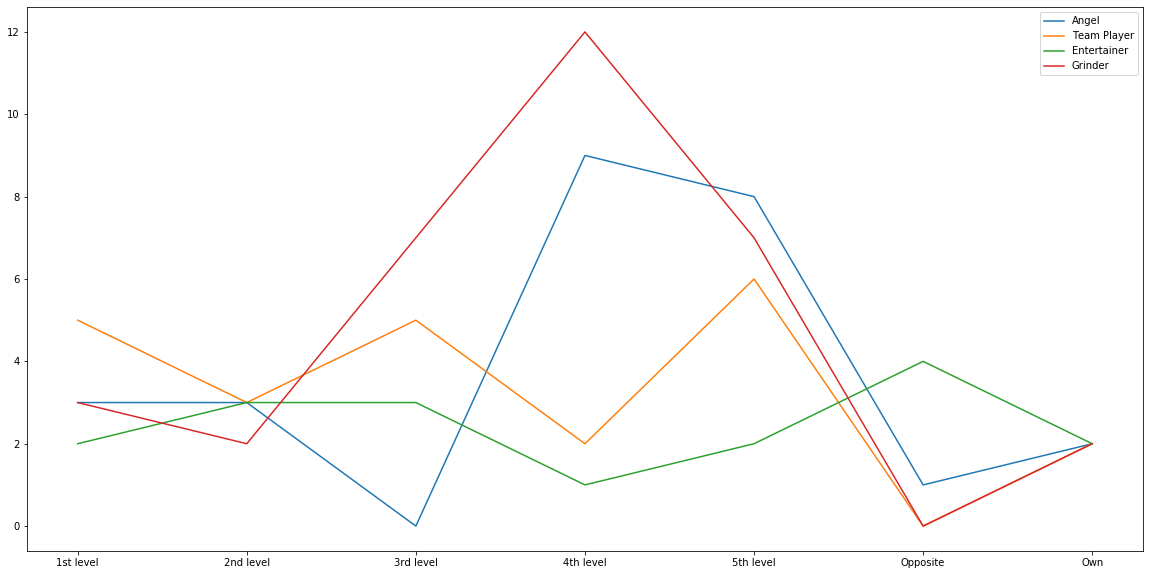

In [73]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.plot(data1.index.values, data1["count"].values, label = "Angel")
plt.plot(data2.index.values, data2["count"].values, label = "Team Player")
plt.plot(data3.index.values, data3["count"].values, label = "Entertainer")
plt.plot(data4.index.values, data4["count"].values, label = "Grinder")
plt.legend()
plt.show()

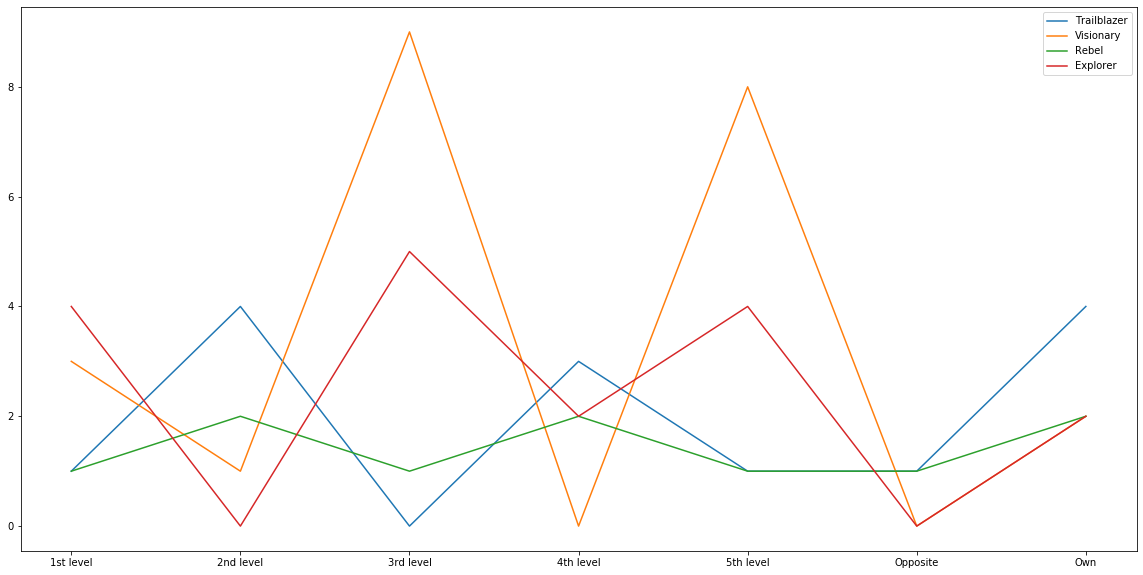

In [74]:
figure(figsize=(20, 10))
plt.plot(data5.index.values, data5["count"].values, label = "Trailblazer")
plt.plot(data6.index.values, data6["count"].values, label = "Visionary")
plt.plot(data7.index.values, data7["count"].values, label = "Rebel")
plt.plot(data8.index.values, data8["count"].values, label = "Explorer")
plt.legend()
plt.show()

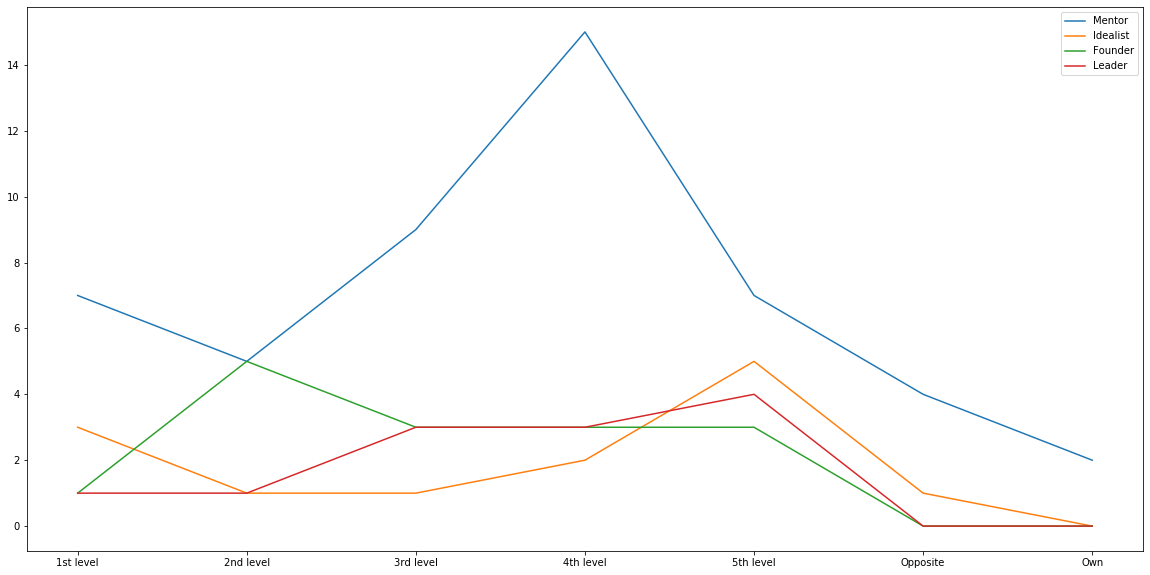

In [75]:
figure(figsize=(20, 10))
plt.plot(data9.index.values, data9["count"].values, label = "Mentor")
plt.plot(data10.index.values, data10["count"].values, label = "Idealist")
plt.plot(data11.index.values, data11["count"].values, label = "Founder")
plt.plot(data12.index.values, data12["count"].values, label = "Leader")
plt.legend()
plt.show()

In [76]:
# Work with archetype and secondary traits


# Import individuation files

sur_columns = pd.read_csv("columns.csv", header=None)
sur_columns[0].values

array(['resp_id', 'collect_id', 'start_date', 'end_date', 'ip_address',
       'email', 'first_name', 'last_name', 'custom_data_1', 'good_friend',
       'age', 'age_friend', 'Connector', 'Still', 'Poet', 'Empathetic',
       'Optimistic', 'Enthusiast', 'Controller', 'Director', 'Achiever',
       'Bonvivant', 'Player', 'Original', 'Blindfolded', 'Servant',
       'Nomad', 'Keeper', 'Aequanimus', 'Like Water', 'Simulation',
       'Guided', 'Believer', 'Agnostic', 'Moderator', 'Modernist',
       'Traditionalist', 'Seeker', 'Adventurer', 'Jumper', 'Juggler',
       'Perfectionist', 'Champion', 'Ally', 'Artist', 'Realist',
       'Ingenious', 'Shapeshifter', 'Driver', 'Archetype_1',
       'Archetype_2', 'Archetype_3', 'Archetype_4', 'Archetype_friend',
       'Age_2', 'Gender', 'Income', 'Region', 'Device'], dtype=object)

In [77]:
sur_file_complete = pd.read_csv("Kinds Survey.csv", names=sur_columns[0].values, header=1)

In [78]:
text_1 = "I strongly identify with it. My friend doesn't."
text_2 = "I don't strongly identify with it. My friend does."
text_3 = "Neither of us strongly identify with it."
text_4 = "Both of us strongly identify with it."


sur_file_complete = sur_file_complete.replace(to_replace = [text_1, text_2, text_3, text_4], value=[1, 2, 3, 4])

In [79]:
for col in list(sur_file_complete.loc[:, "Connector":"Shapeshifter"].columns):
    dummy3 = pd.get_dummies(sur_file_complete[col], prefix=col)
    dummy3.iloc[:,0] = dummy3.iloc[:,0] + dummy3.iloc[:,3]
    dummy3.iloc[:,1] = dummy3.iloc[:,1] + dummy3.iloc[:,3]
    dummy3 = dummy3.astype("category")
    #dummy3 = dummy3.drop([(col+"_3"), (col+"_4")], axis=1)
    sur_file_complete = pd.concat([sur_file_complete, dummy3], axis=1).drop([(col+"_3"), (col+"_4")], axis=1)

In [80]:
sur_file_complete = sur_file_complete.rename(columns={"Archetype_1":"Imagination", "Archetype_2":"Intellect", "Archetype_3":"Intuition", "Archetype_4":"Empathy"}) 


# Renaming traits


lt_visionary = "THE VISIONARY: Imagination, knowledge, and persuasion when combined can transform anything. You can turn any ordinary situation into an extraordinary one if you apply yourself to understand its elements and learn how to hack, combine and re-shape them."
lt_founder = "THE FOUNDER: Without a bold vision there is no point in creating anything, but without a solid execution, the vision becomes just mere hallucination. Imagination is as useful as the service it ultimately provides to humankind. Let's create the future, one experiment at a time."
lt_explorer = "THE EXPLORER: The truth is out there and belongs to the ones who are brave enough to venture outside their comfort zones to find it. We are born to explore; life is not about the finish line, the peak or the prize. It is about the exploration, the path to discovery, the journey to the unknown."
lt_mentor = "THE MENTOR: Wisdom does not come from trying to control or bend reality. It comes from applying oneself to understand it deeply. We must uncover the true nature of things surrounding us. Read, contemplate, research, deploy whatever tool is needed to turn ignorance into understanding."
lt_rebel = "THE REBEL: Rules are meant to be broken. It is not enough to move society using incremental steps; revolution sometimes is necessary to break through old habits and useless traditions. It opens space for real change to take place. Chaos is a close cousin of creativity."
lt_leader = "THE LEADER:One can only transcend and grow by taking the lead, assuming full responsibility for one's acts. If you want people to follow you, show them first how it's done, be the role model. Order, not chaos, will take you closer to significant accomplishments in life."
lt_grinder = "THE GRINDER:Where there's will, there's a way. There is no better gift than the endurance to thrive in scarcity, and the grit to keep moving forward during tough times. It takes courage, sacrifice and a strong ability to keep the main thing the main thing at all times and at all costs."
lt_idealist = "THE IDEALIST:In the end, good always prevails. We should never lose faith. Optimism is a powerful mental state to remain happy while navigating the challenges of life. We must choose what is just and right, even if it means choosing what is uncomfortable and not convenient."
lt_teamplayer = "THE TEAM PLAYER:To happily navigate life one must become a member of a community or group. The ultimate path to fulfillment lies in being able to feel a strong sense of belonging. Being surrounded by people, we care about is the goal. To fit in, be one with the group is the strategy."
lt_angel = "THE ANGEL:To be of service to others, contributing and actively participating in people's growth is the ultimate goal. Encouragement is a rare find these days; it seems everyone feels more comfortable playing the critic. We must choose kindness over hate and support over judging."
lt_trailblazer = "THE TRAILBLAZER"
lt_entertainer = "THE ENTERTAINER:You only live once, but if you make it fun enough, it more than suffices. The best things in life revolve laughter and joy. There is no point in spending time with annoying people and non-sense formalities. Take things more lightly; it is not that serious. Trust the process."

lt_visionary2 = "The Visionary: Imagination, knowledge, and persuasion when combined can transform anything."
lt_founder2 = "The Founder: Without a bold vision there is no point in creating anything, but without a solid execution, the vision becomes just mere hallucination.  Let's create the future, one experiment at a time."
lt_explorer2 = "The Explorer: The truth is out there and belongs to the ones who are brave enough to venture outside their comfort zones to find it. We are born to explore."
lt_mentor2 = "The Mentor: Read, contemplate, research, deploy whatever tool is needed to turn ignorance in understanding."
lt_rebel2 = "The Rebel: Rules are meant to be broken."
lt_leader2 = "The Leader: One can only transcend and grow by taking the lead, assuming full responsibility for one's acts."
lt_grinder2 = "The Grinder: Where there's will, there's a way. There is no better gift than the endurance to thrive in scarcity, and the grit to keep moving forward during tough times."
lt_idealist2 = "The Idealist: In the end, good always prevails. We should never lose faith."
lt_teamplayer2 = "The Team Player: To happily navigate life one must become a member of a community or group. Being surrounded by people, we care about is the goal."
lt_angel2 = "The Angel: We must choose kindness over hate and support over judging."
lt_trailblazer2 = "The Trailblazer: Live life with passion. Follow your bliss, the path of the soul. Find your purpose then pursue it with everything you've got. The rest will follow."
lt_entertainer2 = "The Entertainer: You only live once, but if you make it fun enough, it more than suffices. The best things in life revolve laughter and joy."


original_text = [lt_visionary, lt_founder, lt_explorer, lt_mentor, lt_rebel, lt_leader, lt_grinder, lt_idealist, lt_teamplayer, lt_angel, lt_trailblazer, lt_entertainer]
original_text2 = [lt_visionary2, lt_founder2, lt_explorer2, lt_mentor2, lt_rebel2, lt_leader2, lt_grinder2, lt_idealist2, lt_teamplayer2, lt_angel2, lt_trailblazer2, lt_entertainer2]



st_visionary = "Visionary"
st_founder = "Founder"
st_explorer = "Explorer"
st_mentor = "Mentor"
st_rebel = "Rebel"
st_leader = "Leader"
st_grinder = "Grinder"
st_idealist = "Idealist"
st_teamplayer = "Team Player"
st_angel = "Angel"
st_trailblazer = "Trailblazer"
st_entertainer = "Entertainer"

new_text = [st_visionary, st_founder, st_explorer, st_mentor, st_rebel, st_leader, st_grinder, st_idealist, st_teamplayer, st_angel, st_trailblazer, st_entertainer]


sur_file_complete = sur_file_complete.replace(to_replace=original_text, value=new_text)
sur_file_complete = sur_file_complete.replace(to_replace=original_text2, value=new_text)


In [81]:
# Add single column Archetype and drop separate columns

sur_file_complete["Archetype"] = sur_file_complete["Intellect"][sur_file_complete["Intellect"].notnull()].append(sur_file_complete["Imagination"][sur_file_complete["Imagination"].notnull()]).append(sur_file_complete["Intuition"][sur_file_complete["Intuition"].notnull()]).append(sur_file_complete["Empathy"][sur_file_complete["Empathy"].notnull()])
sur_file_complete = sur_file_complete.drop(labels=["Imagination", "Intellect", "Intuition", "Empathy"], axis=1)

In [82]:
list(sur_file_complete.columns)

['resp_id',
 'collect_id',
 'start_date',
 'end_date',
 'ip_address',
 'email',
 'first_name',
 'last_name',
 'custom_data_1',
 'good_friend',
 'age',
 'age_friend',
 'Connector',
 'Still',
 'Poet',
 'Empathetic',
 'Optimistic',
 'Enthusiast',
 'Controller',
 'Director',
 'Achiever',
 'Bonvivant',
 'Player',
 'Original',
 'Blindfolded',
 'Servant',
 'Nomad',
 'Keeper',
 'Aequanimus',
 'Like Water',
 'Simulation',
 'Guided',
 'Believer',
 'Agnostic',
 'Moderator',
 'Modernist',
 'Traditionalist',
 'Seeker',
 'Adventurer',
 'Jumper',
 'Juggler',
 'Perfectionist',
 'Champion',
 'Ally',
 'Artist',
 'Realist',
 'Ingenious',
 'Shapeshifter',
 'Driver',
 'Archetype_friend',
 'Age_2',
 'Gender',
 'Income',
 'Region',
 'Device',
 'Connector_1',
 'Connector_2',
 'Still_1',
 'Still_2',
 'Poet_1',
 'Poet_2',
 'Empathetic_1',
 'Empathetic_2',
 'Optimistic_1',
 'Optimistic_2',
 'Enthusiast_1',
 'Enthusiast_2',
 'Controller_1',
 'Controller_2',
 'Director_1',
 'Director_2',
 'Achiever_1',
 'Achiever_

In [83]:
# Changing sequence of columns:

sur_file_complete = sur_file_complete[['resp_id',
 'collect_id',
 'start_date',
 'end_date',
 'ip_address',
 'email',
 'first_name',
 'last_name',
 'custom_data_1',
 'good_friend',
 'age',
 'age_friend',
 'Archetype',
 'Archetype_friend',                                     
 'Connector',
 'Still',
 'Poet',
 'Empathetic',
 'Optimistic',
 'Enthusiast',
 'Controller',
 'Director',
 'Achiever',
 'Bonvivant',
 'Player',
 'Original',
 'Blindfolded',
 'Servant',
 'Nomad',
 'Keeper',
 'Aequanimus',
 'Like Water',
 'Simulation',
 'Guided',
 'Believer',
 'Agnostic',
 'Moderator',
 'Modernist',
 'Traditionalist',
 'Seeker',
 'Adventurer',
 'Jumper',
 'Juggler',
 'Perfectionist',
 'Champion',
 'Ally',
 'Artist',
 'Realist',
 'Ingenious',
 'Shapeshifter',
 'Driver',
 'Age_2',
 'Gender',
 'Income',
 'Region',
 'Device',
 'Connector_1',
 'Connector_2',
 'Still_1',
 'Still_2',
 'Poet_1',
 'Poet_2',
 'Empathetic_1',
 'Empathetic_2',
 'Optimistic_1',
 'Optimistic_2',
 'Enthusiast_1',
 'Enthusiast_2',
 'Controller_1',
 'Controller_2',
 'Director_1',
 'Director_2',
 'Achiever_1',
 'Achiever_2',
 'Bonvivant_1',
 'Bonvivant_2',
 'Player_1',
 'Player_2',
 'Original_1',
 'Original_2',
 'Blindfolded_1',
 'Blindfolded_2',
 'Servant_1',
 'Servant_2',
 'Nomad_1',
 'Nomad_2',
 'Keeper_1',
 'Keeper_2',
 'Aequanimus_1',
 'Aequanimus_2',
 'Like Water_1',
 'Like Water_2',
 'Simulation_1',
 'Simulation_2',
 'Guided_1',
 'Guided_2',
 'Believer_1',
 'Believer_2',
 'Agnostic_1',
 'Agnostic_2',
 'Moderator_1',
 'Moderator_2',
 'Modernist_1',
 'Modernist_2',
 'Traditionalist_1',
 'Traditionalist_2',
 'Seeker_1',
 'Seeker_2',
 'Adventurer_1',
 'Adventurer_2',
 'Jumper_1',
 'Jumper_2',
 'Juggler_1',
 'Juggler_2',
 'Perfectionist_1',
 'Perfectionist_2',
 'Champion_1',
 'Champion_2',
 'Ally_1',
 'Ally_2',
 'Artist_1',
 'Artist_2',
 'Realist_1',
 'Realist_2',
 'Ingenious_1',
 'Ingenious_2',
 'Shapeshifter_1',
 'Shapeshifter_2']]

In [84]:
sur_file_complete[['Connector_1', 'Connector_2', 'Still_1',
       'Still_2', 'Poet_1', 'Poet_2', 'Empathetic_1', 'Empathetic_2',
       'Optimistic_1', 'Optimistic_2', 'Enthusiast_1', 'Enthusiast_2',
       'Controller_1', 'Controller_2', 'Director_1', 'Director_2',
       'Achiever_1', 'Achiever_2', 'Bonvivant_1', 'Bonvivant_2', 'Player_1',
       'Player_2', 'Original_1', 'Original_2', 'Blindfolded_1',
       'Blindfolded_2', 'Servant_1', 'Servant_2', 'Nomad_1', 'Nomad_2',
       'Keeper_1', 'Keeper_2', 'Aequanimus_1', 'Aequanimus_2', 'Like Water_1',
       'Like Water_2', 'Simulation_1', 'Simulation_2', 'Guided_1', 'Guided_2',
       'Believer_1', 'Believer_2', 'Agnostic_1', 'Agnostic_2', 'Moderator_1',
       'Moderator_2', 'Modernist_1', 'Modernist_2', 'Traditionalist_1',
       'Traditionalist_2', 'Seeker_1', 'Seeker_2', 'Adventurer_1',
       'Adventurer_2', 'Jumper_1', 'Jumper_2', 'Juggler_1', 'Juggler_2',
       'Perfectionist_1', 'Perfectionist_2', 'Champion_1', 'Champion_2',
       'Ally_1', 'Ally_2', 'Artist_1', 'Artist_2', 'Realist_1', 'Realist_2',
       'Ingenious_1', 'Ingenious_2', 'Shapeshifter_1', 'Shapeshifter_2']].describe()

,Connector_1,Connector_2,Still_1,Still_2,Poet_1,Poet_2,Empathetic_1,Empathetic_2,Optimistic_1,Optimistic_2,...,Ally_1,Ally_2,Artist_1,Artist_2,Realist_1,Realist_2,Ingenious_1,Ingenious_2,Shapeshifter_1,Shapeshifter_2
count,126,126,126,126,126,126,126,126,126,126,...,126,126,126,126,126,126,126,126,126,126
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,1,1,1
freq,83,71,65,65,90,83,67,72,65,71,...,72,74,67,73,64,65,70,63,91,85


In [85]:
col_own = ['Connector_1', 'Still_1','Poet_1', 'Empathetic_1', 'Optimistic_1', 'Enthusiast_1', 'Controller_1', 'Director_1', 'Achiever_1', 'Bonvivant_1', 'Player_1','Original_1', 'Blindfolded_1','Servant_1', 'Nomad_1', 'Keeper_1', 'Aequanimus_1', 'Like Water_1','Simulation_1', 'Guided_1', 'Believer_1', 'Agnostic_1', 'Moderator_1','Modernist_1', 'Traditionalist_1','Seeker_1', 'Adventurer_1','Jumper_1', 'Juggler_1', 'Perfectionist_1', 'Champion_1', 'Ally_1', 'Artist_1', 'Realist_1', 'Ingenious_1', 'Shapeshifter_1']
col_friend = ['Connector_2', 'Still_2','Poet_2', 'Empathetic_2', 'Optimistic_2', 'Enthusiast_2', 'Controller_2', 'Director_2', 'Achiever_2', 'Bonvivant_2', 'Player_2','Original_2', 'Blindfolded_2','Servant_2', 'Nomad_2', 'Keeper_2', 'Aequanimus_2', 'Like Water_2','Simulation_2', 'Guided_2', 'Believer_2', 'Agnostic_2', 'Moderator_2','Modernist_2', 'Traditionalist_2','Seeker_2', 'Adventurer_2','Jumper_2', 'Juggler_2', 'Perfectionist_2', 'Champion_2', 'Ally_2', 'Artist_2', 'Realist_2', 'Ingenious_2', 'Shapeshifter_2']

In [86]:
# traditionalist with traditionalist:

len(sur_file_complete[(sur_file_complete["Traditionalist_1"] == 1) & (sur_file_complete["Traditionalist_2"] == 1)])

27

In [87]:
# modernist with modernist:

len(sur_file_complete[(sur_file_complete["Modernist_1"] == 1) & (sur_file_complete["Modernist_2"] == 1)])

46

In [88]:
# traditionalist with modernist:

len(sur_file_complete[(sur_file_complete["Traditionalist_1"] == 1) & (sur_file_complete["Modernist_2"] == 1)])

8

In [89]:
# modernist with traditionalist:

len(sur_file_complete[(sur_file_complete["Modernist_1"] == 1) & (sur_file_complete["Traditionalist_2"] == 1)])

11

In [90]:
# guided with guided:

len(sur_file_complete[(sur_file_complete["Guided_1"] == 1) & (sur_file_complete["Guided_2"] == 1)])

42

In [91]:
# agnostic with agnostic:

len(sur_file_complete[(sur_file_complete["Agnostic_1"] == 1) & (sur_file_complete["Agnostic_2"] == 1)])

32

In [92]:
# guided with agnostic:

len(sur_file_complete[(sur_file_complete["Guided_1"] == 1) & (sur_file_complete["Agnostic_2"] == 1)])

12

In [93]:
# agnostic with guided:

len(sur_file_complete[(sur_file_complete["Agnostic_1"] == 1) & (sur_file_complete["Guided_2"] == 1)])

14

In [94]:
# believer with believer:

len(sur_file_complete[(sur_file_complete["Believer_1"] == 1) & (sur_file_complete["Believer_2"] == 1)])

58

In [95]:
# believer with non-believer:

len(sur_file_complete[(sur_file_complete["Believer_1"] == 1) & (sur_file_complete["Believer_2"] == 0)])

15

In [96]:
# non-believer with believer:

len(sur_file_complete[(sur_file_complete["Believer_1"] == 0) & (sur_file_complete["Believer_2"] == 1)])

15

In [97]:
sur_file_complete.loc[:,'Connector':'Shapeshifter'].astype("category").describe()

,Connector,Still,Poet,Empathetic,Optimistic,Enthusiast,Controller,Director,Achiever,Bonvivant,...,Adventurer,Jumper,Juggler,Perfectionist,Champion,Ally,Artist,Realist,Ingenious,Shapeshifter
count,126,126,126,126,126,126,126,126,126,126,...,126,126,126,126,126,126,126,126,126,126
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
top,3,3,3,3,3,4,4,4,3,4,...,4,3,4,3,4,3,3,4,4,4
freq,53,37,65,41,37,43,47,52,74,60,...,47,56,48,59,41,52,49,43,42,65


In [98]:
# contar quantos registros para cada categoria 1, 2, 3, 4 e kind, plotar x com kinds, barras para cada count

kinds_count = pd.DataFrame()

for col in list(sur_file_complete.loc[:, "Connector":"Shapeshifter"].columns):
    count = sur_file_complete.groupby(col).size()
    kinds_count = pd.concat([kinds_count, count], axis=1)

In [99]:
kinds = list(sur_file_complete.loc[:, "Connector":"Shapeshifter"].columns)

In [100]:
kinds_count.columns = kinds

In [101]:
kinds_count

,Connector,Still,Poet,Empathetic,Optimistic,Enthusiast,Controller,Director,Achiever,Bonvivant,...,Adventurer,Jumper,Juggler,Perfectionist,Champion,Ally,Artist,Realist,Ingenious,Shapeshifter
1,18,28,18,31,34,26,39,27,16,17,...,25,19,24,23,28,22,24,19,28,26
2,30,28,25,18,24,23,17,17,14,9,...,16,21,15,17,20,20,18,22,21,20
3,53,37,65,41,37,34,23,30,74,40,...,38,56,39,59,37,52,49,42,35,15
4,25,33,18,36,31,43,47,52,22,60,...,47,30,48,27,41,32,35,43,42,65


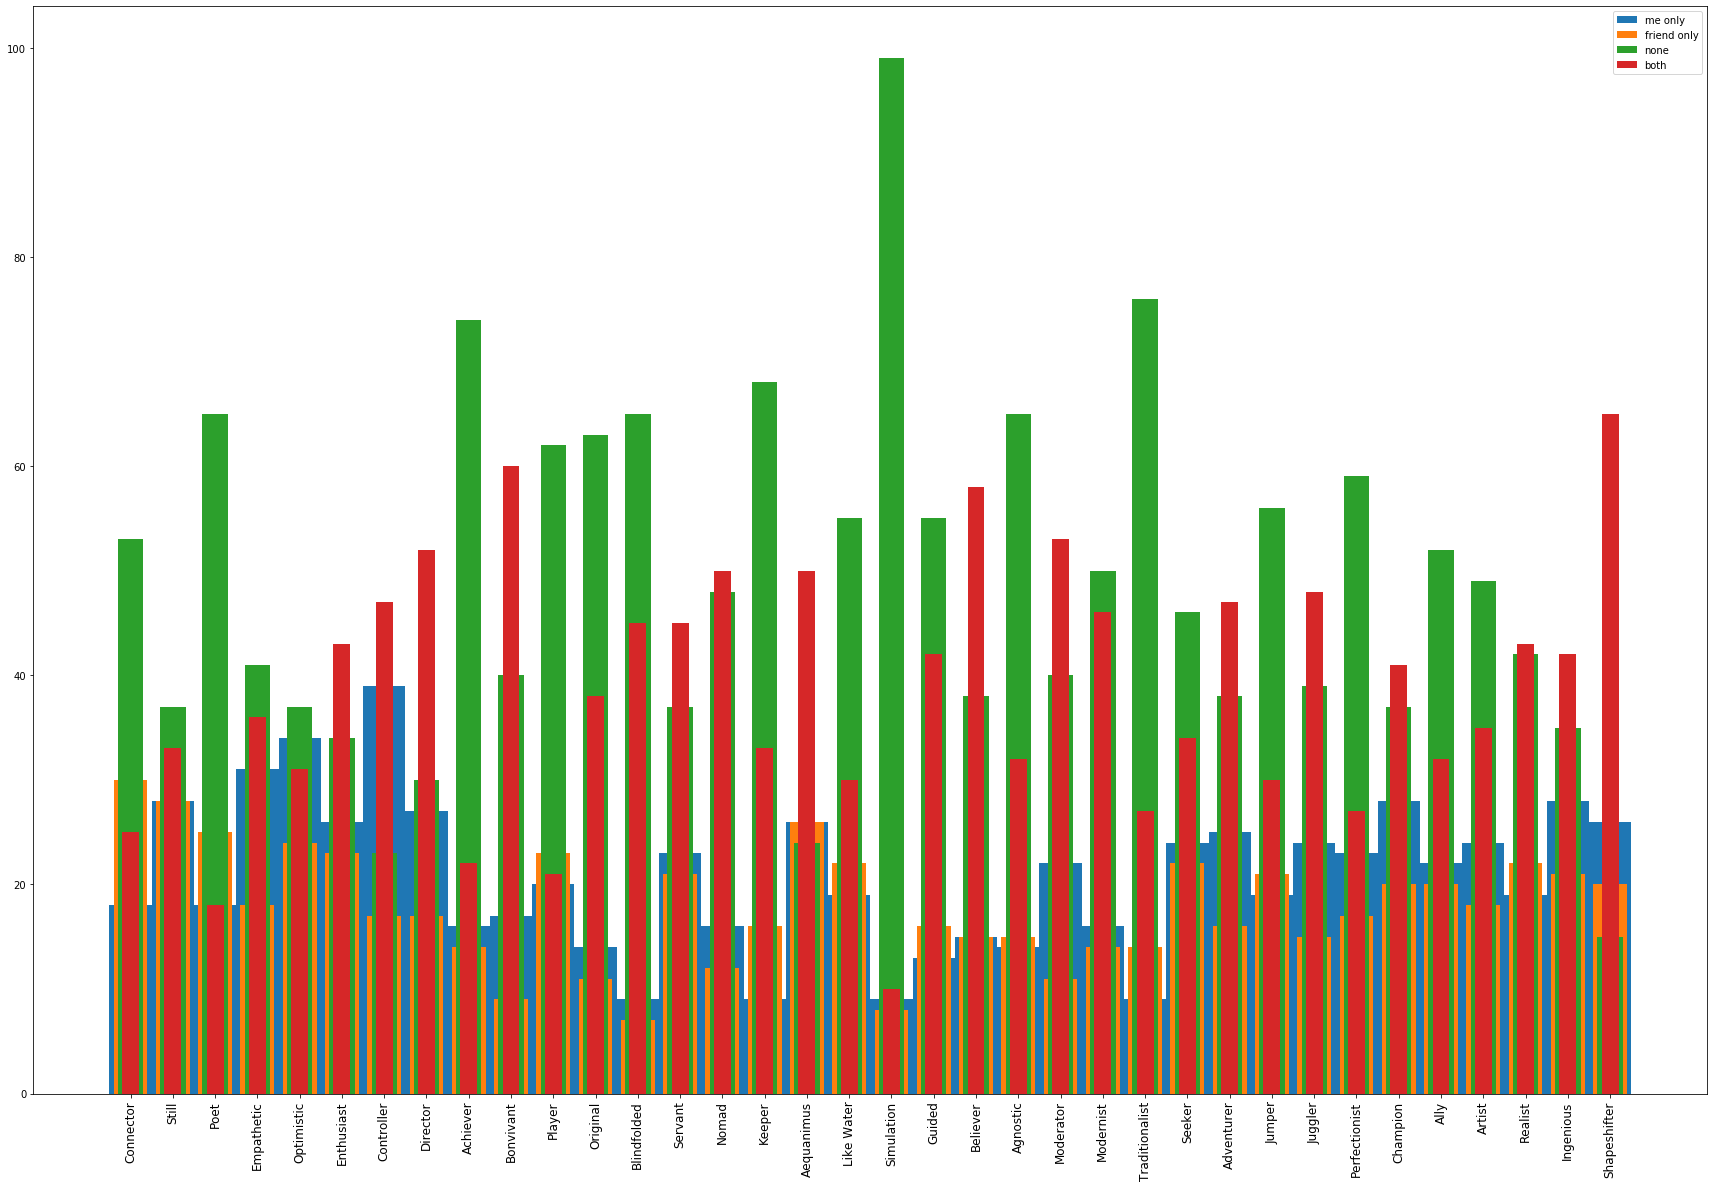

In [102]:

figure(figsize=(30, 20))
plt.bar(kinds_count.columns, kinds_count.values[0], label = "me only", width=1)
plt.bar(kinds_count.columns, kinds_count.values[1], label = "friend only", width=0.8)
plt.bar(kinds_count.columns, kinds_count.values[2], label = "none", width=0.6)
plt.bar(kinds_count.columns, kinds_count.values[3], label = "both", width=0.4)
plt.legend()
plt.xticks(rotation = 90, fontsize='large')
plt.show()

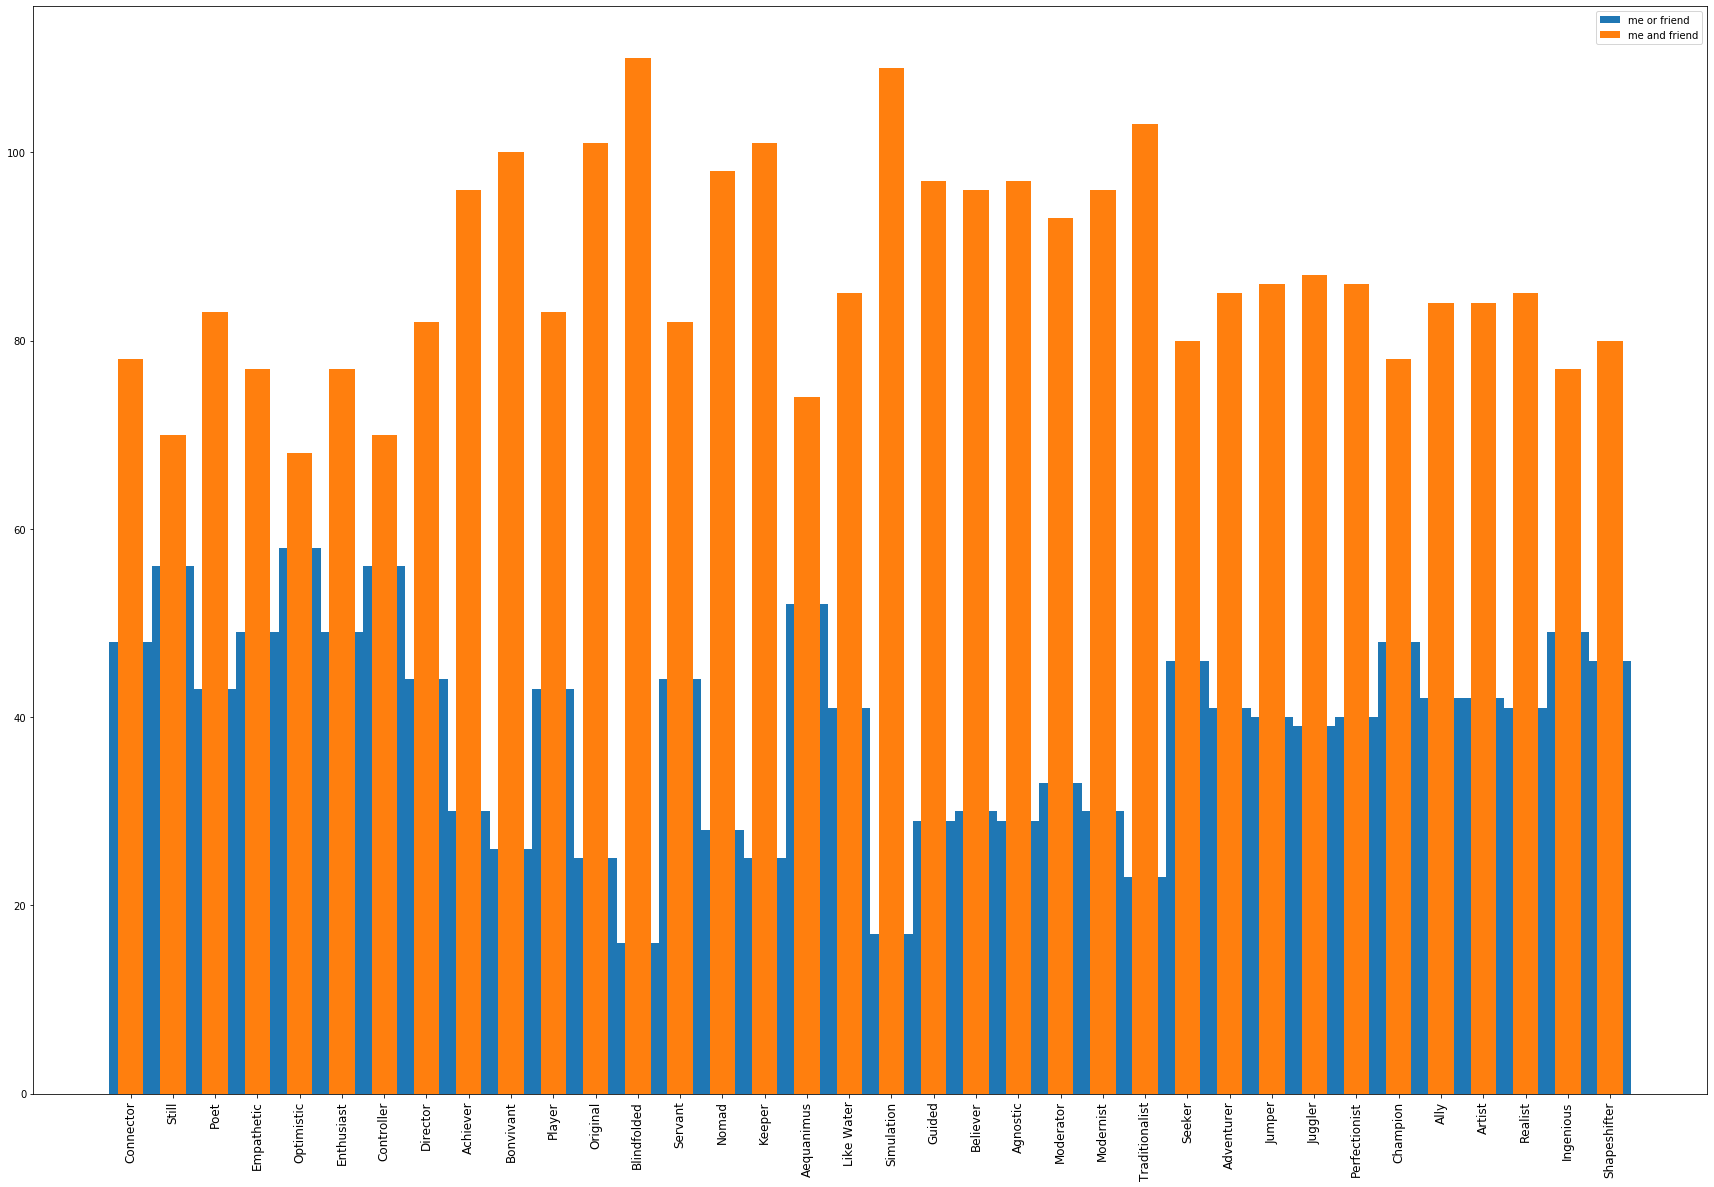

In [103]:

figure(figsize=(30, 20))
plt.bar(kinds_count.columns, kinds_count.values[0]+kinds_count.values[1], label = "me or friend", width=1)
plt.bar(kinds_count.columns, kinds_count.values[2]+kinds_count.values[3], label = "me and friend", width=0.6)
plt.legend()
plt.xticks(rotation = 90, fontsize='large')
plt.show()

In [104]:
arch_own = pd.get_dummies(sur_file_complete["Archetype"])
arch_friend = pd.get_dummies(sur_file_complete["Archetype_friend"])

In [105]:
own = sur_file_complete[col_own + ['Archetype', 'resp_id']]
own_final = pd.concat([own, arch_own], axis=1).drop("Archetype", axis=1).set_index(keys='resp_id')

In [106]:
own_final

,Connector_1,Still_1,Poet_1,Empathetic_1,Optimistic_1,Enthusiast_1,Controller_1,Director_1,Achiever_1,Bonvivant_1,...,Explorer,Founder,Grinder,Idealist,Leader,Mentor,Rebel,Team Player,Trailblazer,Visionary
resp_id,,,,,,,,,,,,,,,,,,,,,
10685776497,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10685807846,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10685825602,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10685807042,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
10685776602,0,0,1,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680846569,1,1,1,1,1,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
10680837346,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10680688896,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
friend = sur_file_complete[col_friend + ['Archetype_friend', 'resp_id']]
friend_final = pd.concat([friend, arch_friend], axis=1).drop("Archetype_friend", axis=1).set_index(keys='resp_id')



In [108]:
friend_final

,Connector_2,Still_2,Poet_2,Empathetic_2,Optimistic_2,Enthusiast_2,Controller_2,Director_2,Achiever_2,Bonvivant_2,...,Explorer,Founder,Grinder,Idealist,Leader,Mentor,Rebel,Team Player,Trailblazer,Visionary
resp_id,,,,,,,,,,,,,,,,,,,,,
10685776497,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10685807846,0,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
10685825602,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10685807042,1,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
10685776602,0,1,0,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680846569,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
10680837346,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10680688896,1,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [109]:
# Calculate cosine similarity between people

matrix_p = np.round_(cosine_similarity(own_final, friend_final), 2)

In [110]:
matrix_p = pd.DataFrame(matrix_p)

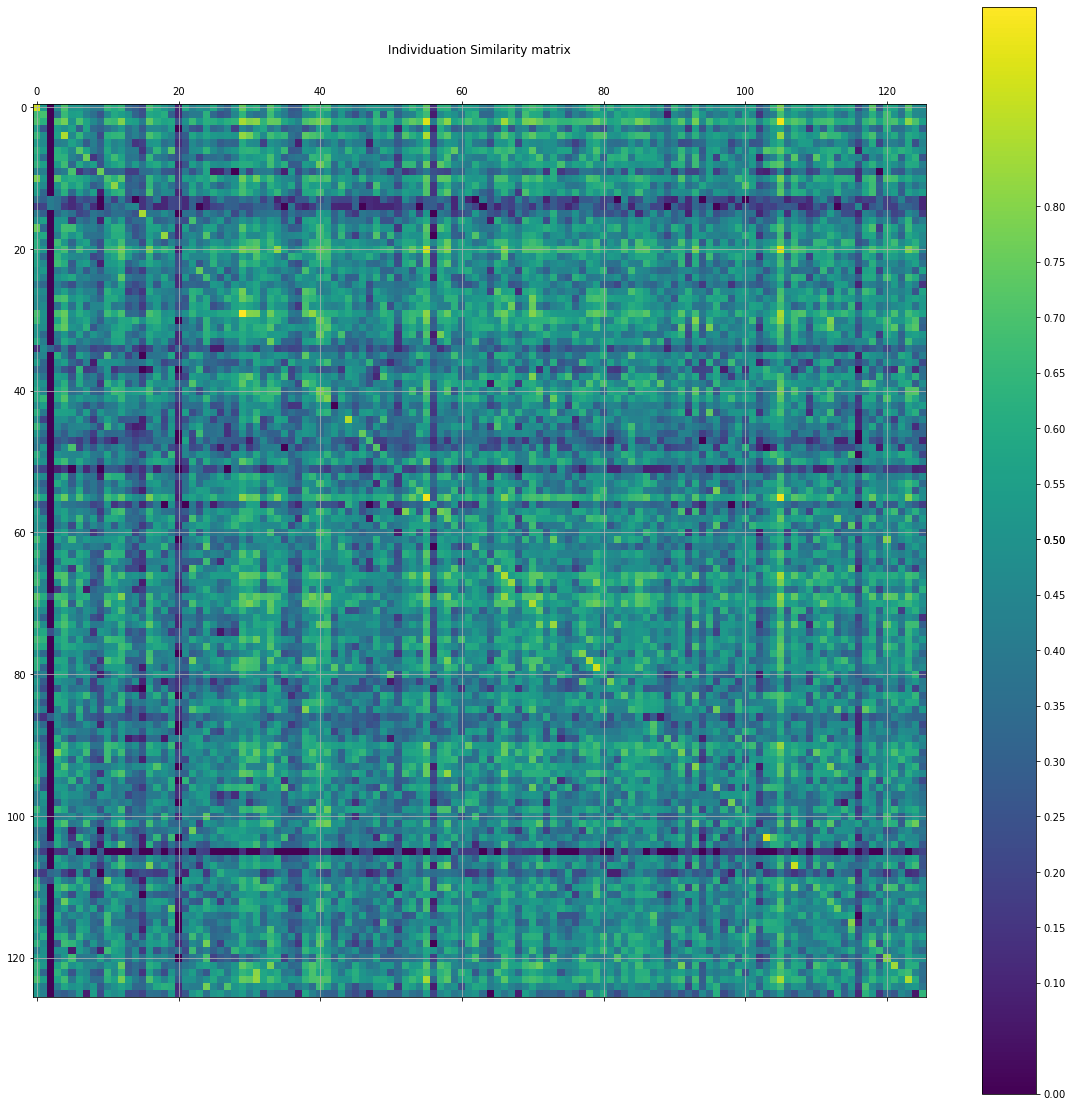

In [111]:
#figure(figsize=(20, 6))

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(matrix_p, interpolation='nearest')
ax.grid(True)
plt.title('Individuation Similarity matrix')
#plt.xticks(labels, rotation=90);
#plt.yticks(labels);
fig.colorbar(cax, ticks=[0, 0.5, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80])
plt.show()

In [112]:
ind_score_survey = matrix_p.set_index(own_final.index)
ind_score_survey

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
resp_id,,,,,,,,,,,,,,,,,,,,,
10685776497,0.91,0.53,0.0,0.48,0.70,0.51,0.52,0.46,0.40,0.40,...,0.24,0.41,0.72,0.28,0.59,0.57,0.40,0.71,0.48,0.47
10685807846,0.67,0.69,0.0,0.36,0.66,0.55,0.56,0.43,0.36,0.26,...,0.35,0.45,0.62,0.43,0.68,0.51,0.37,0.63,0.46,0.45
10685825602,0.70,0.62,0.0,0.70,0.77,0.50,0.70,0.57,0.47,0.37,...,0.37,0.64,0.70,0.57,0.68,0.70,0.57,0.81,0.70,0.55
10685807042,0.54,0.27,0.0,0.54,0.49,0.56,0.30,0.57,0.34,0.30,...,0.30,0.52,0.36,0.29,0.61,0.36,0.36,0.47,0.54,0.30
10685776602,0.65,0.48,0.0,0.56,0.86,0.46,0.65,0.46,0.43,0.22,...,0.36,0.61,0.69,0.41,0.53,0.60,0.41,0.60,0.56,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680846569,0.65,0.52,0.0,0.56,0.68,0.50,0.56,0.45,0.46,0.39,...,0.24,0.46,0.65,0.33,0.57,0.84,0.39,0.61,0.61,0.35
10680837346,0.63,0.33,0.0,0.63,0.49,0.26,0.49,0.47,0.28,0.25,...,0.25,0.42,0.59,0.41,0.55,0.54,0.64,0.68,0.44,0.36
10680688896,0.69,0.55,0.0,0.57,0.67,0.39,0.57,0.49,0.35,0.35,...,0.28,0.53,0.65,0.54,0.59,0.65,0.54,0.86,0.61,0.35


In [113]:
pd.DataFrame(friend_final.index)

,resp_id
0,10685776497
1,10685807846
2,10685825602
3,10685807042
4,10685776602
...,...
121,10680846569
122,10680837346
123,10680688896
124,10680516021


In [114]:
ind_score_survey.columns

RangeIndex(start=0, stop=126, step=1)

In [115]:
ind_score_survey = ind_score_survey.rename(columns=(pd.DataFrame(friend_final.index)["resp_id"]))
ind_score_survey["resp_id_friend"] = ind_score_survey.columns
ind_score_survey = ind_score_survey.reset_index()
ind_score_survey


,resp_id,10685776497,10685807846,10685825602,10685807042,10685776602,10685770941,10685744391,10685620085,10685712418,...,10680961153,10680958519,10680868413,10680869249,10680846569,10680837346,10680688896,10680516021,10680480794,resp_id_friend
0,10685776497,0.91,0.53,0.0,0.48,0.70,0.51,0.52,0.46,0.40,...,0.41,0.72,0.28,0.59,0.57,0.40,0.71,0.48,0.47,10685776497
1,10685807846,0.67,0.69,0.0,0.36,0.66,0.55,0.56,0.43,0.36,...,0.45,0.62,0.43,0.68,0.51,0.37,0.63,0.46,0.45,10685807846
2,10685825602,0.70,0.62,0.0,0.70,0.77,0.50,0.70,0.57,0.47,...,0.64,0.70,0.57,0.68,0.70,0.57,0.81,0.70,0.55,10685825602
3,10685807042,0.54,0.27,0.0,0.54,0.49,0.56,0.30,0.57,0.34,...,0.52,0.36,0.29,0.61,0.36,0.36,0.47,0.54,0.30,10685807042
4,10685776602,0.65,0.48,0.0,0.56,0.86,0.46,0.65,0.46,0.43,...,0.61,0.69,0.41,0.53,0.60,0.41,0.60,0.56,0.48,10685776602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,10680846569,0.65,0.52,0.0,0.56,0.68,0.50,0.56,0.45,0.46,...,0.46,0.65,0.33,0.57,0.84,0.39,0.61,0.61,0.35,10680846569
122,10680837346,0.63,0.33,0.0,0.63,0.49,0.26,0.49,0.47,0.28,...,0.42,0.59,0.41,0.55,0.54,0.64,0.68,0.44,0.36,10680837346
123,10680688896,0.69,0.55,0.0,0.57,0.67,0.39,0.57,0.49,0.35,...,0.53,0.65,0.54,0.59,0.65,0.54,0.86,0.61,0.35,10680688896
124,10680516021,0.53,0.41,0.0,0.42,0.58,0.50,0.53,0.44,0.52,...,0.69,0.47,0.38,0.59,0.47,0.44,0.51,0.53,0.39,10680516021


In [116]:
ind_score_survey.shape

(126, 128)

In [117]:
ind_score_s_final = pd.melt(ind_score_survey, id_vars="resp_id", var_name="resp_id_friend", value_name="score")

In [118]:
ind_score_s_final = ind_score_s_final.drop(ind_score_s_final[ind_score_s_final["resp_id_friend"] == "resp_id_friend"].index)

In [119]:
# Add archetypes columns

In [120]:
# Merge archetype

inner_join2 = pd.merge(ind_score_s_final, 
                      sur_file_complete[["Archetype", "resp_id"]], 
                      on ='resp_id', 
                      how ='inner')


In [121]:
ind_score_s_temp = pd.merge(inner_join2, 
                      sur_file_complete[["Archetype_friend", "resp_id"]], 
                      left_on ='resp_id_friend',
                      right_on = 'resp_id',
                      how ='inner')

In [122]:
ind_score_s_temp

,resp_id_x,resp_id_friend,score,Archetype,Archetype_friend,resp_id_y
0,10685776497,10685776497,0.91,Visionary,Mentor,10685776497
1,10685807846,10685776497,0.67,Mentor,Mentor,10685776497
2,10685825602,10685776497,0.70,Angel,Mentor,10685776497
3,10685807042,10685776497,0.54,Mentor,Mentor,10685776497
4,10685776602,10685776497,0.65,Idealist,Mentor,10685776497
...,...,...,...,...,...,...
15871,10680846569,10680480794,0.35,Grinder,Team Player,10680480794
15872,10680837346,10680480794,0.36,Angel,Team Player,10680480794
15873,10680688896,10680480794,0.35,Angel,Team Player,10680480794
15874,10680516021,10680480794,0.39,Mentor,Team Player,10680480794


In [123]:
ind_score_s_temp[(ind_score_s_temp['resp_id_x'] == ind_score_s_temp['resp_id_friend']) & (ind_score_s_temp['score'] <=0.46)]

,resp_id_x,resp_id_friend,score,Archetype,Archetype_friend,resp_id_y
254,10685825602,10685825602,0.00,Angel,Founder,10685825602
1651,10685648740,10685648740,0.22,Founder,Rebel,10685648740
1778,10685643286,10685643286,0.45,Founder,Team Player,10685643286
2413,10685369439,10685369439,0.44,Angel,Mentor,10685369439
2540,10685372523,10685372523,0.09,Visionary,Trailblazer,10685372523
4318,10685077017,10685077017,0.20,Founder,Visionary,10685077017
4699,10684953772,10684953772,0.32,Grinder,Entertainer,10684953772
5334,10684752413,10684752413,0.00,Rebel,Leader,10684752413
5461,10681214046,10681214046,0.46,Mentor,Team Player,10681214046
5715,10683185815,10683185815,0.45,Mentor,Grinder,10683185815


In [124]:
# Define weights for archetypes combination

In [125]:
arch_sum = df_count_i.groupby("Arch").sum()
arch_sum

,count
Arch,
Angel,26.0
Entertainer,17.0
Explorer,17.0
Founder,15.0
Grinder,33.0
Idealist,13.0
Leader,12.0
Mentor,49.0
Rebel,10.0


In [126]:
arch_sum_merge = pd.merge(df_count_i, arch_sum, on = "Arch", how ='inner')

In [127]:
# Adjusting weight based on arch combination count

arch_sum_merge["weight"] = arch_sum_merge["count_x"] / arch_sum_merge["count_y"]

In [129]:
arch_sum_merge

,Arch,Arch_friend,Arch_i,Arch_friend_i,count_x,Level,count_y,weight
0,Idealist,Idealist,Idealist,Idealist,0.0,Own,13.0,0.000000
1,Idealist,Leader,Idealist,Leader,1.0,2nd level,13.0,0.076923
2,Idealist,Founder,Idealist,Founder,0.0,1st level,13.0,0.000000
3,Idealist,Angel,Idealist,Angel,0.0,3rd level,13.0,0.000000
4,Idealist,Team Player,Idealist,Team Player,2.0,4th level,13.0,0.153846
...,...,...,...,...,...,...,...,...
139,Mentor,Grinder,Mentor,Grinder,9.0,4th level,49.0,0.183673
140,Mentor,Visionary,Mentor,Visionary,7.0,3rd level,49.0,0.142857
141,Mentor,Rebel,Mentor,Rebel,2.0,2nd level,49.0,0.040816
142,Mentor,Explorer,Mentor,Explorer,4.0,1st level,49.0,0.081633


In [130]:
# Adjust weight only for zero arch combination

arch_sum_merge.loc[(arch_sum_merge["weight"] != 0).index,'weight'] = arch_sum_merge[arch_sum_merge["weight"] != 0][['weight']].replace(to_replace = arch_sum_merge[arch_sum_merge["weight"] != 0][['weight']], value=1)
arch_sum_merge = arch_sum_merge.fillna(0)

In [91]:
arch_sum_merge

,Arch,Arch_friend,Arch_i,Arch_friend_i,count_x,Level,count_y,weight
0,Idealist,Idealist,Idealist,Idealist,0.0,Own,13.0,0.0
1,Idealist,Leader,Idealist,Leader,1.0,2nd level,13.0,1.0
2,Idealist,Founder,Idealist,Founder,0.0,1st level,13.0,0.0
3,Idealist,Angel,Idealist,Angel,0.0,3rd level,13.0,0.0
4,Idealist,Team Player,Idealist,Team Player,2.0,4th level,13.0,1.0
...,...,...,...,...,...,...,...,...
139,Mentor,Grinder,Mentor,Grinder,9.0,4th level,49.0,1.0
140,Mentor,Visionary,Mentor,Visionary,7.0,3rd level,49.0,1.0
141,Mentor,Rebel,Mentor,Rebel,2.0,2nd level,49.0,1.0
142,Mentor,Explorer,Mentor,Explorer,4.0,1st level,49.0,1.0


In [92]:
# bring weights

In [93]:
ind_score_s_temp

,resp_id_x,resp_id_friend,score,Archetype,Archetype_friend,resp_id_y
0,10685776497,10685776497,0.91,Visionary,Mentor,10685776497
1,10685807846,10685776497,0.67,Mentor,Mentor,10685776497
2,10685825602,10685776497,0.70,Angel,Mentor,10685776497
3,10685807042,10685776497,0.54,Mentor,Mentor,10685776497
4,10685776602,10685776497,0.65,Idealist,Mentor,10685776497
...,...,...,...,...,...,...
15871,10680846569,10680480794,0.35,Grinder,Team Player,10680480794
15872,10680837346,10680480794,0.36,Angel,Team Player,10680480794
15873,10680688896,10680480794,0.35,Angel,Team Player,10680480794
15874,10680516021,10680480794,0.39,Mentor,Team Player,10680480794


In [94]:
ind_score_s_weight = pd.merge(ind_score_s_temp, arch_sum_merge, left_on = ["Archetype", "Archetype_friend"], right_on = ["Arch", "Arch_friend"], how = 'left')

In [95]:
ind_score_s_weight["score_final"] = ind_score_s_weight["score"]*ind_score_s_weight["weight"]

In [96]:
ind_score_s_weight[ind_score_s_weight["resp_id_x"] == ind_score_s_weight["resp_id_y"]].describe()

,resp_id_x,score,resp_id_y,count_x,count_y,weight,score_final
count,1.260000e+02,126.000000,1.260000e+02,126.000000,126.000000,126.0,126.000000
mean,1.068323e+10,0.619444,1.068323e+10,3.634921,28.111111,1.0,0.619444
std,1.672602e+06,0.196572,1.672602e+06,2.250700,14.151309,0.0,0.196572
min,1.068048e+10,0.000000,1.068048e+10,1.000000,10.000000,1.0,0.000000
25%,1.068221e+10,0.540000,1.068221e+10,2.000000,17.000000,1.0,0.540000
50%,1.068284e+10,0.635000,1.068284e+10,3.000000,24.500000,1.0,0.635000
75%,1.068510e+10,0.760000,1.068510e+10,5.000000,49.000000,1.0,0.760000
max,1.068583e+10,0.980000,1.068583e+10,9.000000,49.000000,1.0,0.980000


In [131]:
score_dist_friends = ind_score_s_weight[ind_score_s_weight["resp_id_x"] == ind_score_s_weight["resp_id_y"]].sort_values('score_final')['score_final']

(array([ 3.,  2.,  5.,  4.,  8., 26., 26., 29., 17.,  6.]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 ]),
 <a list of 10 Patch objects>)

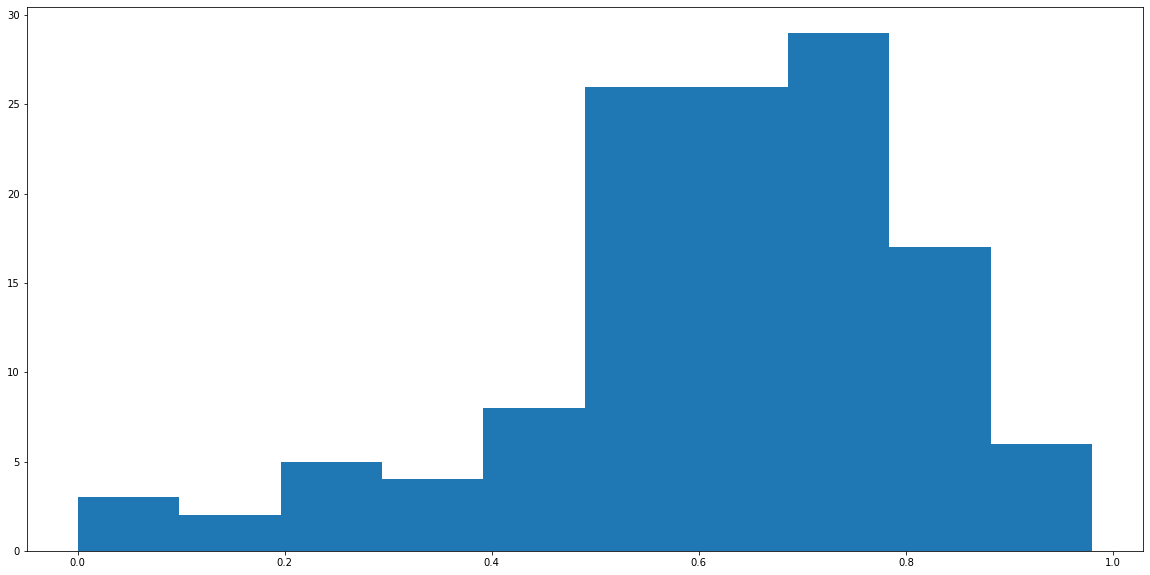

In [133]:
figure(figsize=(20, 10))
plt.hist(score_dist_friends)

In [97]:
sim_matrix_final = ind_score_s_weight.pivot(index="resp_id_x", columns="resp_id_friend", values="score_final").fillna(0)
sim_matrix_final

resp_id_friend,10680480794,10680516021,10680688896,10680837346,10680846569,10680868413,10680869249,10680958519,10680961153,10681011172,...,10685664030,10685699203,10685712418,10685744391,10685770941,10685776497,10685776602,10685807042,10685807846,10685825602
resp_id_x,,,,,,,,,,,,,,,,,,,,,
10680480794,0.64,0.06,0.00,0.46,0.00,0.15,0.33,0.00,0.63,0.11,...,0.00,0.22,0.55,0.52,0.35,0.52,0.00,0.00,0.43,0.0
10680516021,0.39,0.53,0.51,0.44,0.47,0.38,0.59,0.47,0.69,0.18,...,0.43,0.27,0.52,0.53,0.50,0.53,0.58,0.42,0.41,0.0
10680688896,0.35,0.61,0.86,0.54,0.00,0.54,0.59,0.65,0.53,0.28,...,0.63,0.35,0.35,0.57,0.39,0.69,0.00,0.57,0.55,0.0
10680837346,0.36,0.44,0.68,0.64,0.00,0.41,0.55,0.59,0.42,0.25,...,0.65,0.25,0.28,0.49,0.26,0.63,0.00,0.63,0.33,0.0
10680846569,0.35,0.61,0.61,0.39,0.84,0.33,0.57,0.65,0.46,0.24,...,0.53,0.39,0.46,0.56,0.50,0.65,0.68,0.00,0.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685776497,0.00,0.48,0.71,0.40,0.00,0.28,0.59,0.72,0.41,0.24,...,0.00,0.40,0.00,0.52,0.51,0.91,0.00,0.48,0.53,0.0
10685776602,0.48,0.56,0.00,0.41,0.60,0.41,0.53,0.00,0.61,0.36,...,0.00,0.22,0.43,0.65,0.46,0.65,0.86,0.56,0.48,0.0
10685807042,0.30,0.54,0.47,0.36,0.36,0.29,0.61,0.36,0.52,0.30,...,0.37,0.30,0.34,0.30,0.56,0.54,0.49,0.54,0.27,0.0


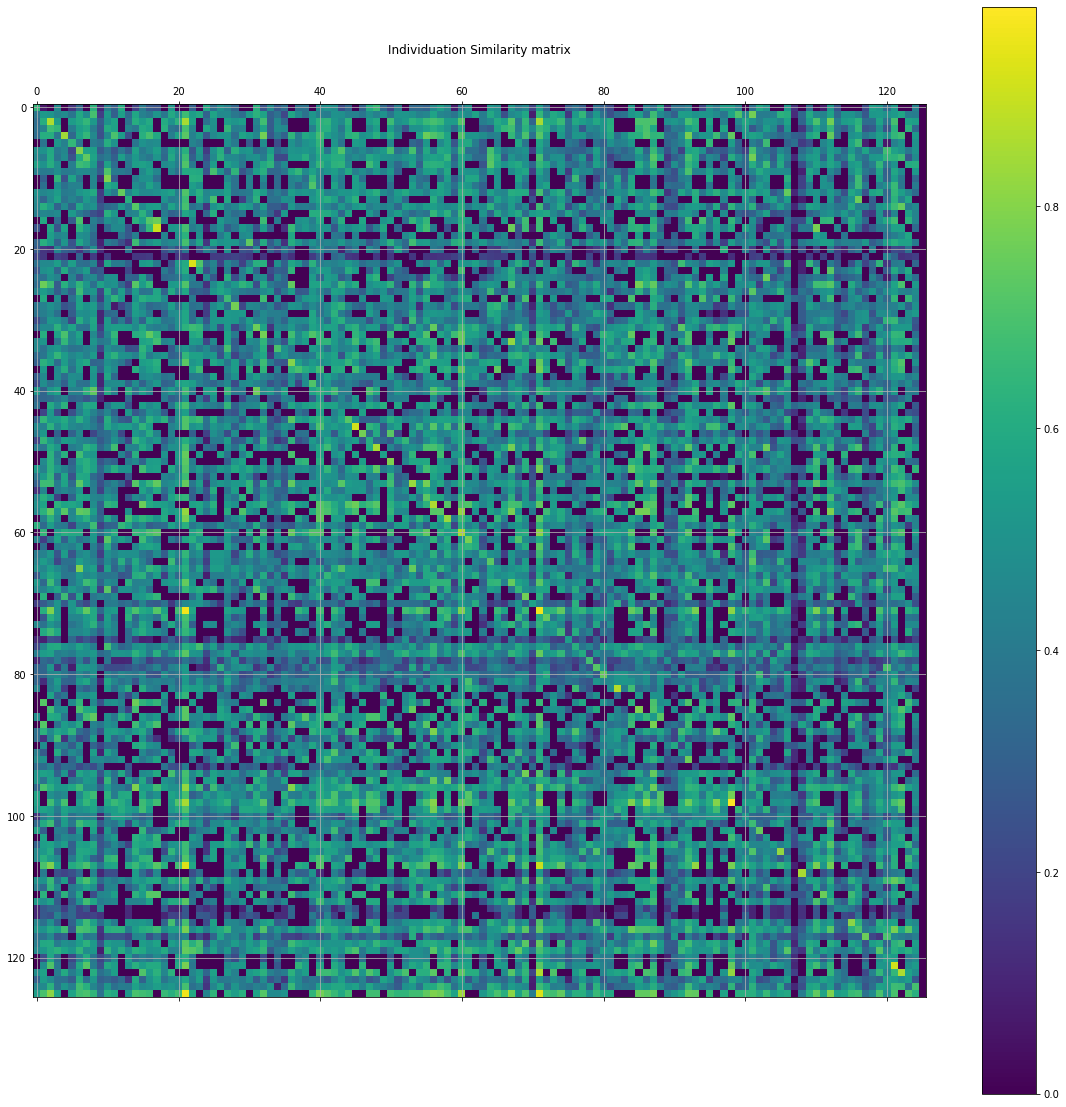

In [98]:
#figure(figsize=(20, 6))

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(sim_matrix_final, interpolation='nearest')
ax.grid(True)
plt.title('Individuation Similarity matrix')
#plt.xticks(labels, rotation=90);
#plt.yticks(labels);
fig.colorbar(cax)
plt.show()

Using weights doesn't give a good result for similarity.

In [99]:
own_final = own_final.reset_index()

In [100]:
# Calculate similarity based on kind weights

politics_weight = [100, 100, 100]

spiritual_weight = [100, 100, 100]

other_weights = [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


# Adjust weights for political traits:

own_final[['Traditionalist_1', 'Modernist_1']] = own_final[['Traditionalist_1', 'Modernist_1']].replace(to_replace=[1], value=[80])


# Spiritual

own_final[['Agnostic_1', 'Guided_1']] = own_final[['Agnostic_1', 'Guided_1']].replace(to_replace=[1], value=[80])


# Adjust weights for main archetype (people)

own_final[["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"]] = own_final[["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"]].replace(to_replace=[1], value=[50])


# Adjust weights for other traits:

own_final[['Artist_1', 'Connector_1', 'Bonvivant_1', 'Still_1', 'Blindfolded_1', 'Realist_1',
       'Controller_1', 'Aequanimus_1', 'Nomad_1', 'Player_1', 'Poet_1', 'Director_1',
       'Like Water_1', 'Optimistic_1', 'Enthusiast_1', 'Shapeshifter_1', 'Jumper_1',
       'Seeker_1', 'Achiever_1', 'Champion_1', 'Juggler_1', 'Keeper_1',
       'Servant_1', 'Original_1', 'Empathetic_1', 'Ingenious_1', 'Ally_1',
       'Perfectionist_1', 'Adventurer_1', 'Simulation_1', 'Moderator_1', 'Believer_1']] = own_final[['Artist_1', 'Connector_1', 'Bonvivant_1', 'Still_1', 'Blindfolded_1', 'Realist_1',
       'Controller_1', 'Aequanimus_1', 'Nomad_1', 'Player_1', 'Poet_1', 'Director_1',
       'Like Water_1', 'Optimistic_1', 'Enthusiast_1', 'Shapeshifter_1', 'Jumper_1',
       'Seeker_1', 'Achiever_1', 'Champion_1', 'Juggler_1', 'Keeper_1',
       'Servant_1', 'Original_1', 'Empathetic_1', 'Ingenious_1', 'Ally_1',
       'Perfectionist_1', 'Adventurer_1', 'Simulation_1', 'Moderator_1', 'Believer_1']].replace(to_replace=[1], value=[40])



In [101]:
own_final

,resp_id,Connector_1,Still_1,Poet_1,Empathetic_1,Optimistic_1,Enthusiast_1,Controller_1,Director_1,Achiever_1,...,Explorer,Founder,Grinder,Idealist,Leader,Mentor,Rebel,Team Player,Trailblazer,Visionary
0,10685776497,0,40,0,40,0,40,40,40,0,...,0,0,0,0,0,0,0,0,0,50
1,10685807846,0,40,0,40,0,0,0,40,0,...,0,0,0,0,0,50,0,0,0,0
2,10685825602,40,40,40,40,40,40,40,40,40,...,0,0,0,0,0,0,0,0,0,0
3,10685807042,0,0,0,0,0,0,40,40,40,...,0,0,0,0,0,50,0,0,0,0
4,10685776602,0,0,40,40,40,40,40,40,40,...,0,0,0,50,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,10680846569,40,40,40,40,40,40,40,40,0,...,0,0,50,0,0,0,0,0,0,0
122,10680837346,40,0,0,40,40,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,10680688896,40,0,40,40,40,40,40,40,40,...,0,0,0,0,0,0,0,0,0,0
124,10680516021,0,0,0,40,0,0,40,40,40,...,0,0,0,0,0,50,0,0,0,0


In [102]:
# Add weight to politics and spiritual if not choosen before:


index1 = own_final.loc[(own_final["Guided_1"] == 0) & (own_final["Agnostic_1"] == 0) & (own_final["Believer_1"] == 0) & (own_final["Simulation_1"] == 0)].index
index1

Int64Index([7, 11, 14, 33, 51, 57, 64, 72, 81, 82, 86, 105, 110, 116, 117,
            118],
           dtype='int64')

In [103]:
own_final

,resp_id,Connector_1,Still_1,Poet_1,Empathetic_1,Optimistic_1,Enthusiast_1,Controller_1,Director_1,Achiever_1,...,Explorer,Founder,Grinder,Idealist,Leader,Mentor,Rebel,Team Player,Trailblazer,Visionary
0,10685776497,0,40,0,40,0,40,40,40,0,...,0,0,0,0,0,0,0,0,0,50
1,10685807846,0,40,0,40,0,0,0,40,0,...,0,0,0,0,0,50,0,0,0,0
2,10685825602,40,40,40,40,40,40,40,40,40,...,0,0,0,0,0,0,0,0,0,0
3,10685807042,0,0,0,0,0,0,40,40,40,...,0,0,0,0,0,50,0,0,0,0
4,10685776602,0,0,40,40,40,40,40,40,40,...,0,0,0,50,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,10680846569,40,40,40,40,40,40,40,40,0,...,0,0,50,0,0,0,0,0,0,0
122,10680837346,40,0,0,40,40,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,10680688896,40,0,40,40,40,40,40,40,40,...,0,0,0,0,0,0,0,0,0,0
124,10680516021,0,0,0,40,0,0,40,40,40,...,0,0,0,0,0,50,0,0,0,0


In [104]:
own_final.loc[index1, ["Believer_1"]] = own_final.iloc[index1][["Believer_1"]].replace(to_replace = [0], value=[20])

In [105]:
index2 = own_final.loc[(own_final["Modernist_1"] == 0) & (own_final["Traditionalist_1"] == 0) & (own_final["Moderator_1"] == 0)].index

In [106]:
own_final.loc[index2, ["Moderator_1"]] = own_final.iloc[index2][["Moderator_1"]].replace(to_replace = [0], value=[20])

In [107]:
## same for friend

friend_final = friend_final.reset_index()

In [108]:
#friend_final.drop('index', axis=1)

In [109]:
# Calculate similarity based on kind weights

politics_weight = [100, 100, 100]

spiritual_weight = [100, 100, 100]

other_weights = [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


# Adjust weights for political traits:

friend_final[['Traditionalist_2', 'Modernist_2']] = friend_final[['Traditionalist_2', 'Modernist_2']].replace(to_replace=[1], value=[80])


# Spiritual

friend_final[['Agnostic_2', 'Guided_2']] = friend_final[['Agnostic_2', 'Guided_2']].replace(to_replace=[1], value=[80])


# Adjust weights for main archetype (people)

friend_final[["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"]] = friend_final[["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"]].replace(to_replace=[1], value=[50])


# Adjust weights for other traits:

friend_final[['Artist_2', 'Connector_2', 'Bonvivant_2', 'Still_2', 'Blindfolded_2', 'Realist_2',
       'Controller_2', 'Aequanimus_2', 'Nomad_2', 'Player_2', 'Poet_2', 'Director_2',
       'Like Water_2', 'Optimistic_2', 'Enthusiast_2', 'Shapeshifter_2', 'Jumper_2',
       'Seeker_2', 'Achiever_2', 'Champion_2', 'Juggler_2', 'Keeper_2',
       'Servant_2', 'Original_2', 'Empathetic_2', 'Ingenious_2', 'Ally_2',
       'Perfectionist_2', 'Adventurer_2', 'Simulation_2', 'Moderator_2', 'Believer_2']] = friend_final[['Artist_2', 'Connector_2', 'Bonvivant_2', 'Still_2', 'Blindfolded_2', 'Realist_2',
       'Controller_2', 'Aequanimus_2', 'Nomad_2', 'Player_2', 'Poet_2', 'Director_2',
       'Like Water_2', 'Optimistic_2', 'Enthusiast_2', 'Shapeshifter_2', 'Jumper_2',
       'Seeker_2', 'Achiever_2', 'Champion_2', 'Juggler_2', 'Keeper_2',
       'Servant_2', 'Original_2', 'Empathetic_2', 'Ingenious_2', 'Ally_2',
       'Perfectionist_2', 'Adventurer_2', 'Simulation_2', 'Moderator_2', 'Believer_2']].replace(to_replace=[1], value=[40])



In [110]:
# Add weight to politics and spiritual if not choosen before:


index1 = friend_final.loc[(friend_final["Guided_2"] == 0) & (friend_final["Agnostic_2"] == 0) & (friend_final["Believer_2"] == 0) & (friend_final["Simulation_2"] == 0)].index
index1 = index1.astype("object")

In [111]:
index1

Index([2, 4, 5, 7, 11, 14, 20, 33, 50, 64, 81, 82, 90, 91, 94, 101, 116, 121], dtype='object')

In [112]:
friend_final.loc[index1, "Believer_2"]

2      0
4      0
5      0
7      0
11     0
14     0
20     0
33     0
50     0
64     0
81     0
82     0
90     0
91     0
94     0
101    0
116    0
121    0
Name: Believer_2, dtype: int64

In [113]:
friend_final.loc[index1, ["Believer_2"]] = friend_final.iloc[index1][["Believer_2"]].replace(to_replace = [0], value=[20])

In [114]:
index2 = friend_final.loc[(friend_final["Modernist_2"] == 0) & (friend_final["Traditionalist_2"] == 0) & (friend_final["Moderator_2"] == 0)].index

In [115]:
friend_final.loc[index2, ["Moderator_2"]] = friend_final.iloc[index2][["Moderator_2"]].replace(to_replace = [0], value=[20])

In [116]:
# New vectors based on archetype circle

vectors_own = own_final
vectors_friend = friend_final

## 1st level

#vectors_own["ideal_founder"] = (vectors_own["Idealist"] + vectors_own["Founder"])*0.5
#vectors_own["founder_leader"] = (vectors_own["Founder"] + vectors_own["Leader"])*0.5
#vectors_own["leader_angel"] = (vectors_own["Leader"] + vectors_own["Angel"])*0.5
#vectors_own["angel_team"] = (vectors_own["Angel"] + vectors_own["Team Player"])*0.5
#vectors_own["team_entertainer"] = (vectors_own["Team Player"] + vectors_own["Entertainer"])*0.5
#vectors_own["entertainer_trail"] = (vectors_own["Entertainer"] + vectors_own["Trailblazer"])*0.5
#vectors_own["trail_grinder"] = (vectors_own["Trailblazer"] + vectors_own["Grinder"])*0.5
#vectors_own["grinder_visionary"] = (vectors_own["Grinder"] + vectors_own["Visionary"])*0.5
#vectors_own["visionary_rebel"] = (vectors_own["Visionary"] + vectors_own["Rebel"])*0.5
#vectors_own["rebel_explorer"] = (vectors_own["Rebel"] + vectors_own["Explorer"])*0.5
#vectors_own["explorer_mentor"] = (vectors_own["Explorer"] + vectors_own["Mentor"])*0.5
#vectors_own["mentor_ideal"] = (vectors_own["Mentor"] + vectors_own["Idealist"])*0.5


## 2nd level

vectors_own["ideal_leader"] = (vectors_own["Idealist"] + vectors_own["Leader"])
vectors_own["founder_angel"] = (vectors_own["Founder"] + vectors_own["Angel"])
vectors_own["leader_team"] = (vectors_own["Leader"] + vectors_own["Team Player"])
vectors_own["angel_entertainer"] = (vectors_own["Angel"] + vectors_own["Entertainer"])
vectors_own["team_trail"] = (vectors_own["Team Player"] + vectors_own["Trailblazer"])
vectors_own["entertainer_grinder"] = (vectors_own["Entertainer"] + vectors_own["Grinder"])
vectors_own["trail_visionary"] = (vectors_own["Trailblazer"] + vectors_own["Visionary"])
vectors_own["grinder_rebel"] = (vectors_own["Grinder"] + vectors_own["Rebel"])
vectors_own["visionary_explorer"] = (vectors_own["Visionary"] + vectors_own["Explorer"])
vectors_own["rebel_mentor"] = (vectors_own["Rebel"] + vectors_own["Mentor"])
vectors_own["explorer_ideal"] = (vectors_own["Explorer"] + vectors_own["Idealist"])
vectors_own["mentor_founder"] = (vectors_own["Mentor"] + vectors_own["Founder"])


vectors_friend["ideal_leader"] = (vectors_friend["Idealist"] + vectors_friend["Leader"])
vectors_friend["founder_angel"] = (vectors_friend["Founder"] + vectors_friend["Angel"])
vectors_friend["leader_team"] = (vectors_friend["Leader"] + vectors_friend["Team Player"])
vectors_friend["angel_entertainer"] = (vectors_friend["Angel"] + vectors_friend["Entertainer"])
vectors_friend["team_trail"] = (vectors_friend["Team Player"] + vectors_friend["Trailblazer"])
vectors_friend["entertainer_grinder"] = (vectors_friend["Entertainer"] + vectors_friend["Grinder"])
vectors_friend["trail_visionary"] = (vectors_friend["Trailblazer"] + vectors_friend["Visionary"])
vectors_friend["grinder_rebel"] = (vectors_friend["Grinder"] + vectors_friend["Rebel"])
vectors_friend["visionary_explorer"] = (vectors_friend["Visionary"] + vectors_friend["Explorer"])
vectors_friend["rebel_mentor"] = (vectors_friend["Rebel"] + vectors_friend["Mentor"])
vectors_friend["explorer_ideal"] = (vectors_friend["Explorer"] + vectors_friend["Idealist"])
vectors_friend["mentor_founder"] = (vectors_friend["Mentor"] + vectors_friend["Founder"])


In [117]:
vectors_own = vectors_own.drop(columns="resp_id")
vectors_friend = vectors_friend.drop(columns="resp_id")

In [118]:
vectors_own.drop(["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"], axis=1)
vectors_friend.drop(["Idealist", "Leader", "Founder", "Angel", "Team Player", "Entertainer", "Trailblazer", "Grinder", "Visionary", "Rebel", "Explorer", "Mentor"], axis=1)



,Connector_2,Still_2,Poet_2,Empathetic_2,Optimistic_2,Enthusiast_2,Controller_2,Director_2,Achiever_2,Bonvivant_2,...,leader_team,angel_entertainer,team_trail,entertainer_grinder,trail_visionary,grinder_rebel,visionary_explorer,rebel_mentor,explorer_ideal,mentor_founder
0,0,40,0,40,0,40,40,40,0,0,...,0,0,0,0,0,0,0,50,0,50
1,0,40,0,40,40,0,0,40,0,0,...,0,0,0,50,0,50,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
3,40,40,0,0,40,0,40,40,40,40,...,0,0,0,0,0,50,0,50,0,0
4,0,40,0,40,40,40,40,40,40,0,...,50,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,40,40,40,40,40,40,0,40,0,40,...,50,0,0,0,0,0,0,0,0,0
122,40,0,0,0,0,0,40,0,0,40,...,0,0,0,0,0,0,0,50,0,50
123,40,0,0,40,40,40,40,0,0,40,...,0,0,0,0,50,0,50,0,0,0
124,40,40,0,0,0,40,0,40,40,40,...,0,50,0,50,0,0,0,0,0,0


In [119]:
#vectors_friend = vectors_friend.drop('index', axis=1)

In [120]:
# Calculate cosine similarity between people

matrix_survey = np.round_(cosine_similarity(vectors_own,vectors_friend), 2)

In [121]:
df_survey = pd.DataFrame(matrix_survey)

In [122]:
df_survey

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,0.77,0.39,0.09,0.36,0.59,0.40,0.40,0.42,0.29,0.29,...,0.18,0.29,0.71,0.22,0.44,0.52,0.28,0.66,0.36,0.33
1,0.68,0.58,0.14,0.42,0.60,0.68,0.40,0.40,0.39,0.16,...,0.37,0.53,0.57,0.30,0.73,0.40,0.39,0.54,0.43,0.41
2,0.54,0.57,0.15,0.63,0.66,0.44,0.63,0.50,0.40,0.35,...,0.41,0.63,0.59,0.53,0.62,0.56,0.54,0.75,0.67,0.52
3,0.54,0.41,0.14,0.51,0.44,0.66,0.19,0.46,0.35,0.33,...,0.33,0.67,0.36,0.18,0.76,0.25,0.37,0.50,0.57,0.30
4,0.51,0.42,0.07,0.58,0.80,0.45,0.55,0.39,0.40,0.15,...,0.38,0.58,0.61,0.29,0.46,0.56,0.37,0.50,0.48,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.56,0.52,0.08,0.48,0.57,0.39,0.56,0.41,0.33,0.48,...,0.26,0.32,0.52,0.32,0.43,0.75,0.28,0.47,0.52,0.24
122,0.48,0.21,0.20,0.53,0.37,0.19,0.53,0.45,0.18,0.17,...,0.24,0.36,0.42,0.46,0.37,0.44,0.63,0.55,0.35,0.34
123,0.55,0.47,0.18,0.41,0.53,0.28,0.50,0.47,0.23,0.36,...,0.26,0.44,0.49,0.54,0.50,0.55,0.46,0.77,0.57,0.23
124,0.53,0.49,0.17,0.44,0.51,0.61,0.35,0.40,0.47,0.33,...,0.25,0.76,0.44,0.25,0.73,0.37,0.42,0.52,0.56,0.36


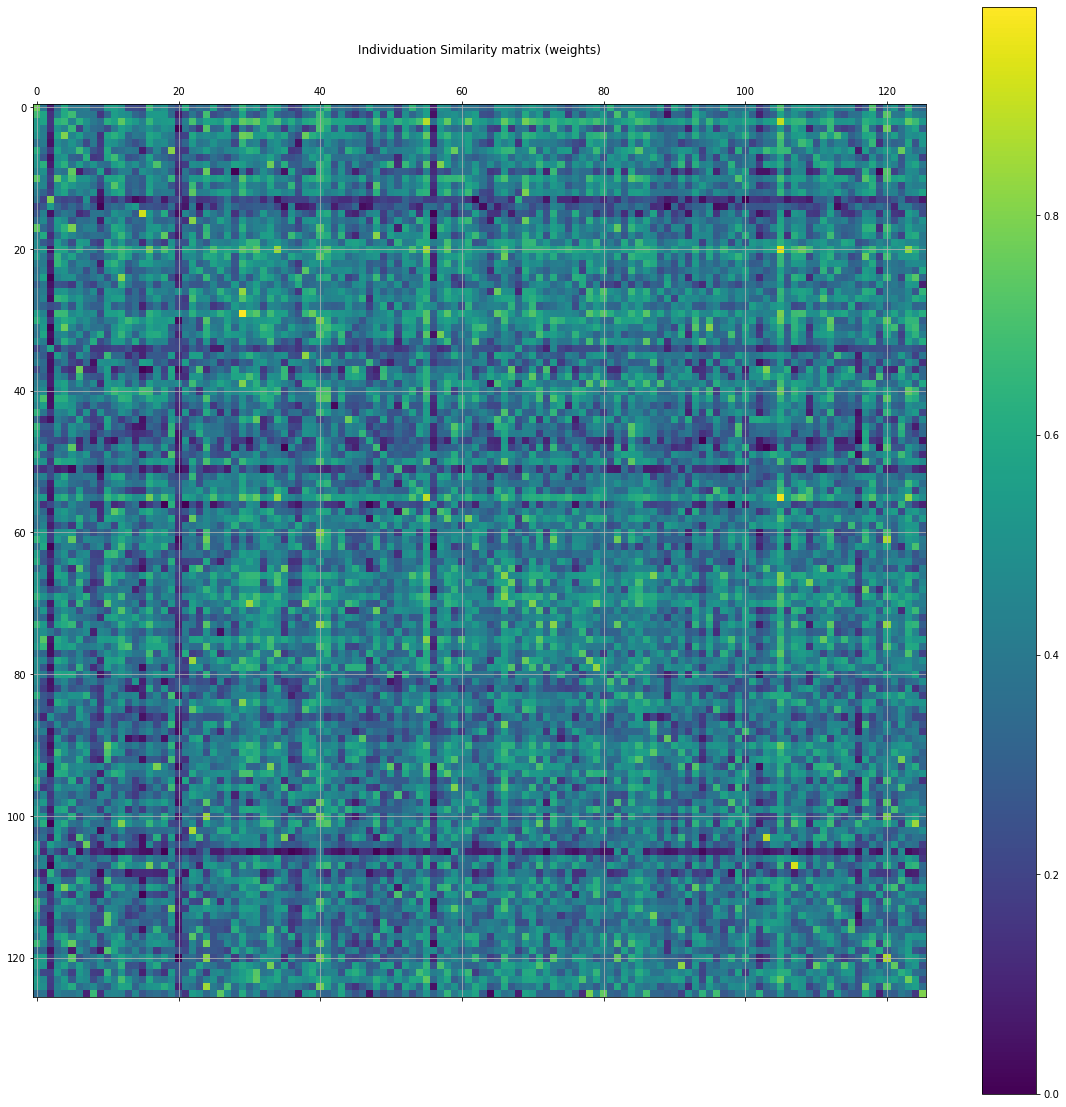

In [123]:
#figure(figsize=(20, 6))

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(df_survey, interpolation='nearest')
ax.grid(True)
plt.title('Individuation Similarity matrix (weights)')
#plt.xticks(labels, rotation=90);
#plt.yticks(labels);
fig.colorbar(cax)
plt.show()

In [131]:
ind_score_p = pd.concat([df_p, ind_file_f["TokenID"]], axis=1)

In [132]:
ind_score_p = ind_score_p.rename(columns=ind_file_f["TokenID"])

In [133]:
ind_score_p

### Driver Stats

In [330]:
driver_stats = ind_file_all.groupby(["Driver"])["Driver"].count()
driver_stats

Driver
Empathy         4
Imagination    11
Intellect      11
Intuition      12
Name: Driver, dtype: int64

In [21]:
ind_file_all

,Respondent,Collector,Start,End,Driver,Imagination,Intellect,Intuition,Empathy,artist,...,guided,servant,original,empathetic,ingenious,ally,perfectionist,adventurer,moderator,TokenID
37,118082767386,446776237,2022-07-20 20:35:23,2022-07-20 20:39:13,Intuition,NaN,NaN,Team Player,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,11.0,NaN,38
36,118082766980,446776237,2022-07-20 20:34:38,2022-07-20 20:44:47,Imagination,Founder,NaN,NaN,NaN,4.0,...,7.0,8.0,10.0,1.0,NaN,NaN,NaN,2.0,NaN,37
35,118082967031,446776237,2022-07-21 00:43:25,2022-07-21 01:19:41,Intuition,NaN,NaN,Idealist,NaN,12.0,...,NaN,NaN,NaN,NaN,3.0,9.0,NaN,8.0,NaN,36
34,118083021730,446776237,2022-07-21 02:05:22,2022-07-21 02:10:03,Intellect,NaN,Mentor,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,35
33,118083361266,446776237,2022-07-21 11:34:19,2022-07-21 14:01:43,Intellect,NaN,Mentor,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,NaN,4.0,NaN,NaN,5.0,34
32,118083352519,446776237,2022-07-21 13:12:29,2022-07-21 14:06:46,Imagination,Visionary,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,5.0,6.0,1.0,NaN,NaN,NaN,33
31,118083490674,446776237,2022-07-21 16:03:02,2022-07-21 16:17:45,Intellect,NaN,Explorer,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,8.0,32
30,118084092335,446776237,2022-07-22 06:36:58,2022-07-22 07:23:09,Imagination,Visionary,NaN,NaN,NaN,1.0,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,31
29,118084169463,446776237,2022-07-22 09:36:47,2022-07-22 09:45:38,Intellect,NaN,Explorer,NaN,NaN,NaN,...,10.0,NaN,12.0,NaN,11.0,NaN,NaN,NaN,NaN,30
28,118084477461,446776237,2022-07-22 16:30:45,2022-07-22 17:09:00,Empathy,NaN,NaN,NaN,Angel,2.0,...,3.0,NaN,NaN,4.0,NaN,6.0,12.0,NaN,NaN,29


In [331]:
driver_percent = (driver_stats / driver_stats.sum())*100
driver_percent

Driver
Empathy        10.526316
Imagination    28.947368
Intellect      28.947368
Intuition      31.578947
Name: Driver, dtype: float64

Text(0, 0.5, '% OF PARTICIPANTS')

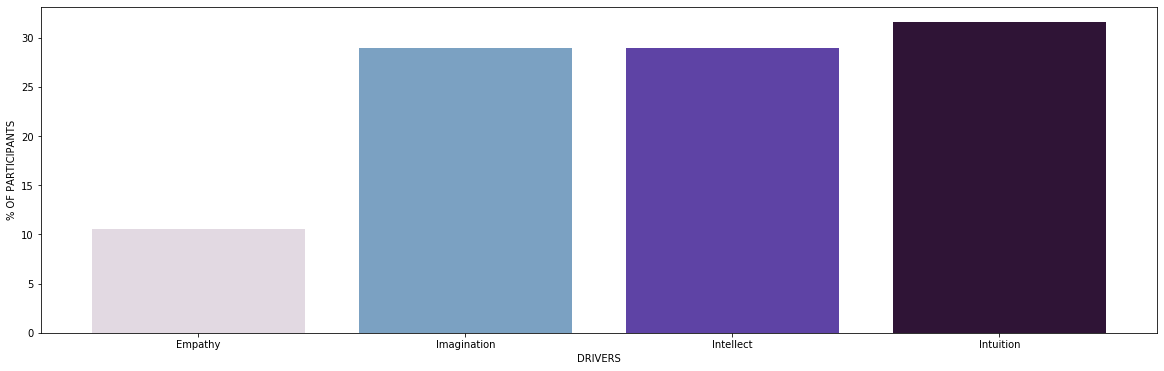

In [332]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6))

colors = plt.get_cmap("twilight")(np.linspace(0, 0.5, len(driver_percent)))

plt.bar(x=driver_percent.index, height=driver_percent.values.tolist(), color=colors)
plt.xlabel("DRIVERS")
plt.ylabel("% OF PARTICIPANTS")

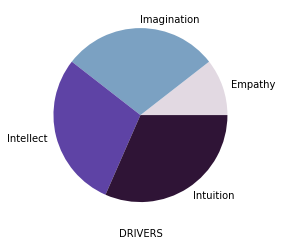

In [353]:
#figure(figsize=(20, 6))

colors = plt.get_cmap("twilight")(np.linspace(0, 0.5, len(driver_percent)))

plt.pie(x=driver_percent.values.tolist(), labels=driver_percent.index, colors=colors)
plt.xlabel("DRIVERS")
plt.savefig('drivers.png', bbox_inches='tight')

In [334]:
np.linspace(0, 0.5, len(driver_percent))

array([0.        , 0.16666667, 0.33333333, 0.5       ])

### Archetype Stats

In [335]:
arche_stats = ind_file.groupby(["Archetype"])["Archetype"].count()
arche_stats

Archetype
Angel          3
Explorer       3
Founder        3
Grinder        3
Idealist       5
Leader         2
Mentor         6
Rebel          2
Team Player    2
Trailblazer    1
Visionary      8
Name: Archetype, dtype: int64

In [336]:
arche_percent = (arche_stats / arche_stats.sum())*100
arche_percent

Archetype
Angel           7.894737
Explorer        7.894737
Founder         7.894737
Grinder         7.894737
Idealist       13.157895
Leader          5.263158
Mentor         15.789474
Rebel           5.263158
Team Player     5.263158
Trailblazer     2.631579
Visionary      21.052632
Name: Archetype, dtype: float64

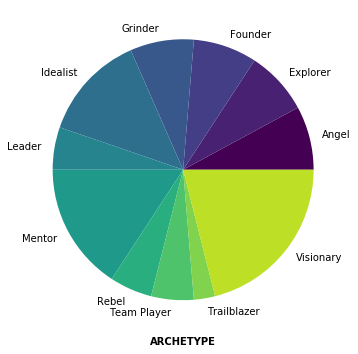

In [354]:
figure(figsize=(20, 6))

colors = plt.get_cmap("viridis")(np.linspace(0, 0.9, len(arche_percent)))

plt.pie(x=arche_percent.values.tolist(), labels=arche_percent.index, colors=colors)
#plt.pie(x=arche_percent.values.tolist(), labels=arche_percent.index)
plt.xlabel("ARCHETYPE", weight='bold')
plt.savefig('archetypes.png', bbox_inches='tight')

In [338]:
pie_csv = arche_percent.to_csv("pie_chart.csv")

In [135]:
ind_file_temp = pd.melt(ind_file.loc[:,'artist':'moderator'], var_name="col1", value_name="col2")
ind_file_temp_gb = ind_file_temp[ind_file_temp['col2'] == 1].groupby('col1').sum()

In [141]:
ind_file_temp_gb['%'] = (ind_file_temp_gb['col2'] / 38)*100

In [154]:
ind_file_temp_gb.sort_values(by='%', ascending=False)['%']

col1
connector         15.789474
artist            10.526316
bonvivant         10.526316
realist            7.894737
adventurer         5.263158
enthusiast         5.263158
original           5.263158
optimistic         5.263158
empathetic         5.263158
believer           5.263158
agnostic           2.631579
director           2.631579
guided             2.631579
modernist          2.631579
controller         2.631579
player             2.631579
poet               2.631579
ally               2.631579
traditionalist     2.631579
Name: %, dtype: float64

Text(0.5, 0, '1st KIND')

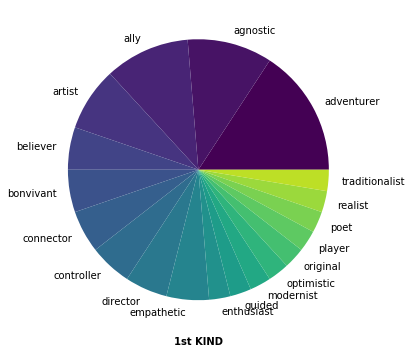

In [153]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6))

colors = plt.get_cmap("viridis")(np.linspace(0, 0.9, len(ind_file_temp_gb['%'])))

plt.pie(x=ind_file_temp_gb.sort_values(by='%', ascending=False)['%'].values.tolist(), labels=ind_file_temp_gb['%'].index, colors=colors)
#plt.pie(x=arche_percent.values.tolist(), labels=arche_percent.index)
plt.xlabel("1st KIND", weight='bold')
#plt.savefig('archetypes.png', bbox_inches='tight')

### Secondary Stats

In [372]:
second_stats = (ind_file.loc[ : , 'Artist':'Moderator'] != 0).sum()

In [374]:
second_stats.count()

36

In [375]:
second_percent = (second_stats / second_stats.count())*100
second_percent

Artist            52.777778
Connector         55.555556
Bonvivant         36.111111
Still             27.777778
Blindfolded       11.111111
Realist           50.000000
Controller        22.222222
Agnostic          19.444444
Traditionalist    13.888889
Aequanimus        30.555556
Believer          44.444444
Nomad             41.666667
Modernist         47.222222
Player            30.555556
Poet              27.777778
Simulation        13.888889
Director          33.333333
Like Water        41.666667
Optimistic        58.333333
Enthusiast        44.444444
Shapeshifter      36.111111
Jumper            22.222222
Seeker            41.666667
Achiever          38.888889
Champion          30.555556
Juggler           36.111111
Keeper             5.555556
Guided            27.777778
Servant           13.888889
Original          47.222222
Empathetic        44.444444
Ingenious         38.888889
Ally              36.111111
Perfectionist     27.777778
Adventurer        58.333333
Moderator         25

Text(0, 0.5, '% OF PARTICIPANTS')

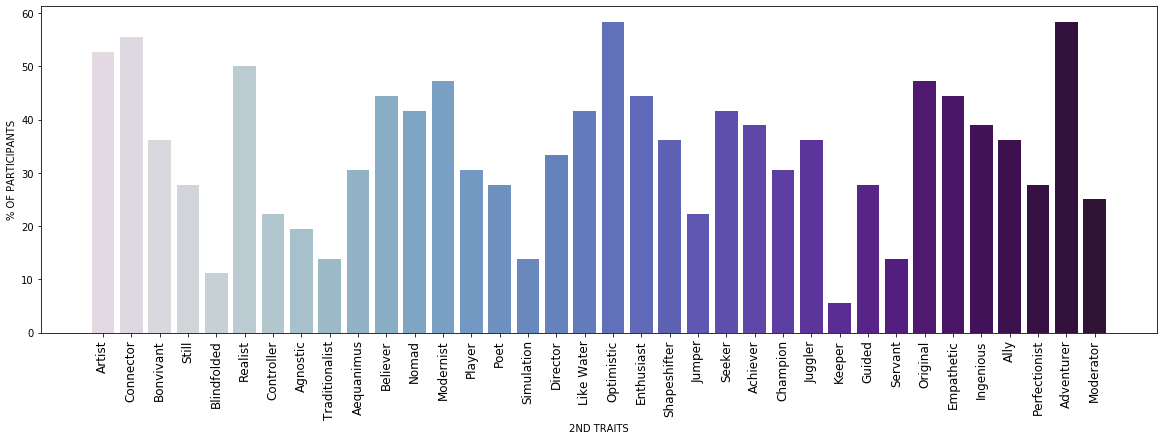

In [378]:
figure(figsize=(20, 6))

colors = plt.get_cmap("twilight")(np.linspace(0, 0.5, len(second_percent)))

plt.bar(x=second_percent.index, height=second_percent.values.tolist(), color=colors)
plt.xticks(rotation = 90, fontsize='large')
plt.xlabel("SECONDARY KINDS")
plt.ylabel("% OF PARTICIPANTS")

In [380]:
second_percent_sort = second_percent.sort_values()

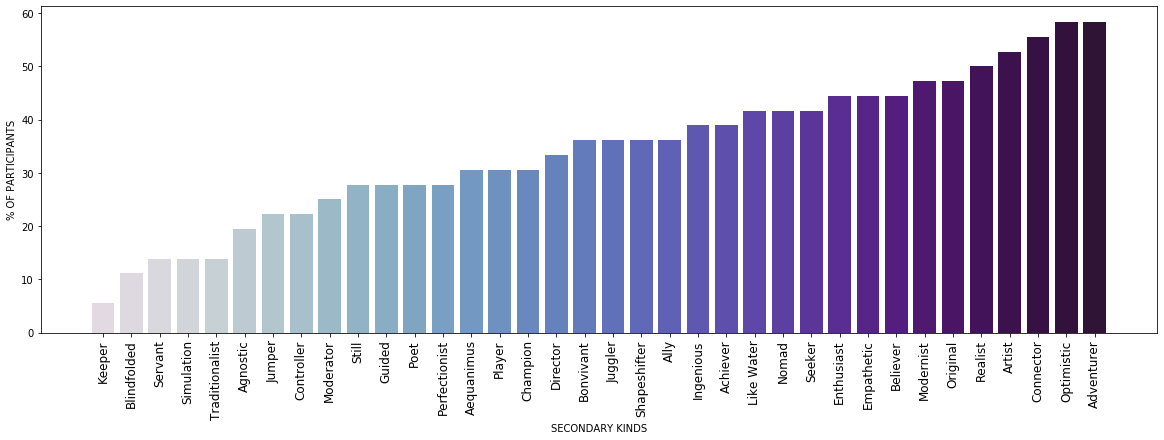

In [382]:
figure(figsize=(20, 6))

colors = plt.get_cmap("twilight")(np.linspace(0, 0.5, len(second_percent_sort)))

plt.bar(x=second_percent_sort.index, height=second_percent_sort.values.tolist(), color=colors)
plt.xticks(rotation = 90, fontsize='large')
plt.xlabel("SECONDARY KINDS")
plt.ylabel("% OF PARTICIPANTS")

plt.savefig('secondary.png', bbox_inches='tight')

## Unsupervised Learning

In [135]:
matrix_adj = ind_score_p_final[["TokenID_x", "TokenID_y", "score"]].pivot(index="TokenID_x", columns="TokenID_y", values="score").fillna(0)/100

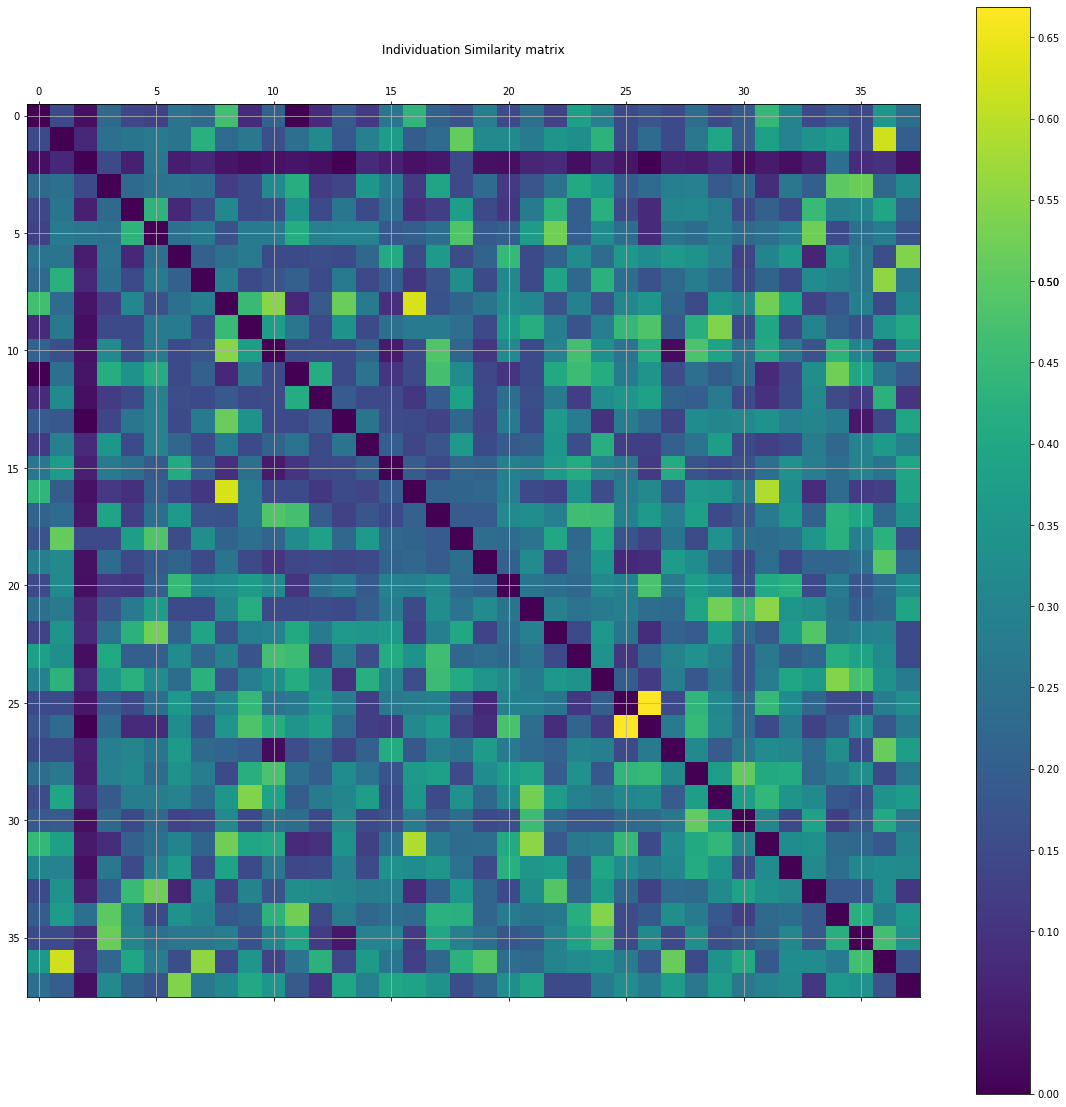

In [340]:
#figure(figsize=(20, 6))

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(matrix_adj, interpolation='nearest')
ax.grid(True)
plt.title('Individuation Similarity matrix')
#plt.xticks(labels, rotation=90);
#plt.yticks(labels);
fig.colorbar(cax, ticks=[0, 0.5, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80])
plt.show()

fig.savefig('similarity.png', bbox_inches='tight')

In [341]:
# Import KMeans
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3, init='k-means++')

# Fit model to points
model.fit(ind_file_f.drop(columns=["TokenID"]))

# Determine the cluster labels of new_points: labels
labels = model.predict(ind_file_f.drop(columns=["TokenID"]))

# Print cluster labels of new_points
print(labels)

[2 1 1 1 1 0 2 0 1 0 1 0 0 1 1 1 2 0 0 1 1 2 1 0 2 0 1 2 0 2 0 2 1 0 1 1 1
 1]


In [342]:
from sklearn.cluster import AffinityPropagation

clustering_aff = AffinityPropagation(affinity='precomputed', damping=0.9).fit_predict(matrix_adj)
clustering_aff

array([2, 6, 0, 5, 0, 0, 1, 6, 2, 4, 2, 5, 6, 2, 4, 1, 2, 5, 0, 6, 3, 4,
       0, 5, 5, 3, 3, 6, 3, 4, 6, 2, 2, 0, 5, 6, 6, 1])

In [343]:
# Count elements in each group:

unique, counts = np.unique(clustering_aff, return_counts=True)

dict(zip(unique, counts))

{0: 6, 1: 3, 2: 7, 3: 4, 4: 4, 5: 6, 6: 8}

In [344]:
# Add groups to dataset

ind_file_f_groups = ind_file_f.copy(deep=True)
ind_file_f_groups["Groups"] = clustering_aff
ind_file_f_groups["Archetype"] = ind_file["Archetype"]
ind_file_f_groups[["TokenID", "Groups", "Archetype"]]

,TokenID,Groups,Archetype
0,zr0,2,Founder
1,vissyarts,6,Explorer
2,verticalgrowtheth,0,Idealist
3,shekinah,5,Rebel
4,shaman,0,Team Player
5,rp_rolu,0,Visionary
6,rileybeans,1,Leader
7,neon,6,Visionary
8,nefertem,2,Angel
9,musicalnetta,4,Explorer


In [345]:
matrix_adj["zr0"]

TokenID_x
342                  0.2427
Amerihun             0.1993
BaronVonHustle       0.0283
Benny                0.3165
Bigboss22            0.2167
Busy                 0.1734
CalllmeScout         0.5415
CaptJames            0.2671
Heitor               0.3135
James                0.4040
Jayism               0.3514
MMA                  0.1875
Mario                0.1029
Mike                 0.3950
Sergio               0.2951
Su                   0.3939
buffalospace         0.3888
cat                  0.3425
frankk               0.1608
gemmz                0.2176
ggclx                0.3319
guilherme            0.3903
jennifersutto        0.1500
koa                  0.1500
lostwithliv          0.2758
lu_rolu              0.3283
lucChao              0.2776
markwieder           0.3747
musicalnetta         0.2680
nefertem             0.3667
neon                 0.2653
rileybeans           0.2992
rp_rolu              0.3174
shaman               0.1078
shekinah             0.3573
verticalgr

In [346]:
ind_score_p_final.sort_values("score", ascending=False)

,TokenID_x,TokenID2,score,Archetype_x,Archetype_y,TokenID_y
788,lu_rolu,lucChao,66.89,Idealist,Leader,lucChao
566,lucChao,lu_rolu,66.89,Leader,Idealist,lu_rolu
687,buffalospace,Heitor,62.78,Mentor,Explorer,Heitor
287,Heitor,buffalospace,62.78,Explorer,Mentor,buffalospace
1074,vissyarts,Amerihun,62.09,Explorer,Idealist,Amerihun
...,...,...,...,...,...,...
1146,342,MMA,0,Idealist,Mentor,MMA
1356,Mike,BaronVonHustle,0,Mentor,Grinder,BaronVonHustle
1343,lucChao,BaronVonHustle,0,Leader,Grinder,BaronVonHustle
811,BaronVonHustle,lucChao,0,Grinder,Leader,lucChao


In [347]:

from sklearn.cluster import SpectralClustering


clustering_spec = SpectralClustering(affinity='precomputed', n_clusters=5, assign_labels='discretize').fit_predict(matrix_adj)
clustering_spec



array([4, 2, 1, 1, 0, 0, 2, 2, 4, 3, 1, 1, 3, 0, 0, 2, 4, 1, 0, 2, 3, 0,
       0, 1, 1, 3, 3, 2, 3, 0, 0, 4, 2, 0, 1, 1, 2, 2])

In [348]:
# Count elements in each group:

unique, counts = np.unique(clustering_spec, return_counts=True)

dict(zip(unique, counts))

{0: 10, 1: 9, 2: 9, 3: 6, 4: 4}

In [349]:
# Add groups to dataset

ind_file_f_groups = ind_file_f.copy(deep=True)
ind_file_f_groups["Groups"] = clustering_spec
ind_file_f_groups["Archetype"] = ind_file["Archetype"]
ind_file_f_groups[["TokenID", "Groups", "Archetype"]]

,TokenID,Groups,Archetype
0,zr0,4,Founder
1,vissyarts,2,Explorer
2,verticalgrowtheth,1,Idealist
3,shekinah,1,Rebel
4,shaman,0,Team Player
5,rp_rolu,0,Visionary
6,rileybeans,2,Leader
7,neon,2,Visionary
8,nefertem,4,Angel
9,musicalnetta,3,Explorer


In [350]:
matrix_adj["Su"]

TokenID_x
342                  0.2620
Amerihun             0.3680
BaronVonHustle       0.0581
Benny                0.2759
Bigboss22            0.2421
Busy                 0.1879
CalllmeScout         0.4091
CaptJames            0.1989
Heitor               0.0890
James                0.2479
Jayism               0.0473
MMA                  0.1008
Mario                0.1474
Mike                 0.1521
Sergio               0.2011
Su                   0.0000
buffalospace         0.1957
cat                  0.1500
frankk               0.2208
gemmz                0.2122
ggclx                0.2936
guilherme            0.2739
jennifersutto        0.3602
koa                  0.4106
lostwithliv          0.2989
lu_rolu              0.2657
lucChao              0.1136
markwieder           0.4107
musicalnetta         0.1736
nefertem             0.1500
neon                 0.1655
rileybeans           0.2441
rp_rolu              0.3395
shaman               0.2859
shekinah             0.2410
verticalgr

In [134]:
#from sklearn.cluster import DBSCAN


#clustering_dbscan = DBSCAN(metric='precomputed', eps=4, min_samples=20).fit_predict(distance_adj)
#clustering_dbscan



